Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
#anltdate="2021-01-05"
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

2021-01-05
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-------

In [2]:
#sc.stop()
#exit()
import os 
# printing environment variables
print(os.environ)

environ({'PACKAGES': 'io.delta:delta-core_2.11:0.5.0', 'HADOOP_HOME': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7', 'HOSTNAME': '4b57754dbd59', 'OLDPWD': '/home/notebookuser', 'JAVA_HOME': '/usr/lib/jvm/default-java', 'PWD': '/home/notebookuser/notebooks', 'HOME': '/home/notebookuser', 'SPARK_LOCAL_IP': '0.0.0.0', 'SPARK_HOME': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7', 'TERM': 'xterm-color', 'PYSPARK_DRIVER_PYTHON': 'jupyter', 'SHLVL': '1', 'PYTHONPATH': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip:/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python:/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python/build:', 'PYSPARK_DRIVER_PYTHON_OPTS': 'notebook', 'PYSPARK_PYTHON': '/home/notebookuser/anaconda3/bin/python', 'PATH': '/home/notebookuser/anaconda3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin', 'PYSPARK_SUBMIT_ARGS': '--packages io.delta:delta-core_2.11:0.5.0  pyspark-shell', '_': '/usr/bin/nohup',

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

2021-01-05
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

2021-01-05


### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2021-01-05  Afghanistan_nan         0        1485.0        1485.0   
1  2021-01-05      Albania_nan         0         185.0        1307.0   
2  2021-01-05      Algeria_nan         0         237.0         748.0   
3  2021-01-05      Andorra_nan         0          57.0         132.0   
4  2021-01-05       Angola_nan         0          42.0         116.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1731.0              53011.0               52538.0  35530000.0   
1        3051.0              59623.0               60171.0   2878445.0   
2        2014.0             100645.0              100989.0  41320000.0   
3         374.0               8249.0                8307.0     77239.0   
4         388.0              17684.0               17755.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001492   
1                                       0.020714   
2                                       0.002436   
3                                       0.106810   
4                                       0.000538   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.014920                   -473.0   
1                                           0.207140                    548.0   
2                                           0.024358                    344.0   
3                                           1.068099                     58.0   
4                                           0.005381                     71.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                  -13.312694             247.285721   
1                  190.380569             435.857147   
2                    8.325266             287.714294   
3                  750.916016              53.428570   
4                    2.160269              55.428570   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           9.743878      
1                                         211.989456      
2                                           9.748306      
3                                         968.422668      
4                                           2.361083

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [7]:
print(configs)

{'analytics_date': '2021-01-05', 'a': 1}


In [8]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {a} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2021-01-05         United States_nan          215408.421875   
1   2021-01-05        United Kingdom_nan           54833.285156   
2   2021-01-05                Brazil_nan           35559.855469   
3   2021-01-05                Russia_nan           25631.857422   
4   2021-01-05                 India_nan           18934.427734   
5   2021-01-05               Germany_nan           17653.285156   
6   2021-01-05                 Italy_nan           15709.571289   
7   2021-01-05          South Africa_nan           14496.857422   
8   2021-01-05                France_nan           13762.857422   
9   2021-01-05                Turkey_nan           13261.713867   
10  2021-01-05              Colombia_nan           11760.571289   
11  2021-01-05                 Spain_nan           11347.286133   
12  2021-01-05               Czechia_nan           10339.142578   
13  2021-01-05                Mexico_nan            9398.428711   
14  2021-01-05                Poland_nan            8848.142578   
15  2021-01-05             Argentina_nan            8346.713867   
16  2021-01-05           Netherlands_nan            8189.428711   
17  2021-01-05             Indonesia_nan            7554.856934   
18  2021-01-05               Ukraine_nan            7222.428711   
19  2021-01-05                  Iran_nan            6162.000000   
20  2021-01-05                Sweden_nan            5904.428711   
21  2021-01-05                Israel_nan            5841.143066   
22  2021-01-05              Portugal_nan            4993.856934   
23  2021-01-05               Romania_nan            3590.000000   
24  2021-01-05                 Japan_nan            3548.428467   
25  2021-01-05           Switzerland_nan            3382.428467   
26  2021-01-05                Panama_nan            3217.857178   
27  2021-01-05            Canada_Ontario            3159.285645   
28  2021-01-05               Ireland_nan            3014.714355   
29  2021-01-05              Slovakia_nan            2858.142822   
30  2021-01-05               Lebanon_nan            2759.857178   
31  2021-01-05                 Chile_nan            2659.000000   
32  2021-01-05                Serbia_nan            2566.571533   
33  2021-01-05             Canada_Quebec            2560.000000   
34  2021-01-05             Lithuania_nan            2232.571533   
35  2021-01-05              Pakistan_nan            2198.714355   
36  2021-01-05               Denmark_nan            2137.285645   
37  2021-01-05              Malaysia_nan            2018.285767   
38  2021-01-05               Austria_nan            1989.428589   
39  2021-01-05               Belarus_nan            1891.857178   
40  2021-01-05               Hungary_nan            1740.285767   
41  2021-01-05  United Arab Emirates_nan            1695.571411   
42  2021-01-05                  Peru_nan            1688.285767   
43  2021-01-05               Tunisia_nan            1656.000000   
44  2021-01-05               Belgium_nan            1593.285767   
45  2021-01-05               Morocco_nan            1539.000000   
46  2021-01-05              Slovenia_nan            1504.428589   
47  2021-01-05                Jordan_nan            1440.428589   
48  2021-01-05                 Egypt_nan            1366.285767   
49  2021-01-05           Philippines_nan            1158.714233   
50  2021-01-05               Bolivia_nan            1153.857178   
51  2021-01-05               Croatia_nan            1153.285767   
52  2021-01-05    Dominican Republic_nan            1138.428589   
53  2021-01-05    West Bank and Gaza_nan            1131.142822   
54  2021-01-05               Georgia_nan            1088.571411   
55  2021-01-05            Canada_Alberta            1038.000000   
56  2021-01-05            Costa Rica_nan             953.428589   
57  2021-01-05                Latvia_nan             897.142883   
58  2021-01-05          Korea, South_nan             893.

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2021-01-05           United States_nan          215408.421875   
1   2021-01-05          United Kingdom_nan           54833.285156   
2   2021-01-05                  Brazil_nan           35559.855469   
3   2021-01-05                  Russia_nan           25631.857422   
4   2021-01-05                 Germany_nan           17653.285156   
5   2021-01-05                   Italy_nan           15709.571289   
6   2021-01-05            South Africa_nan           14496.857422   
7   2021-01-05                  France_nan           13762.857422   
8   2021-01-05                  Turkey_nan           13261.713867   
9   2021-01-05                Colombia_nan           11760.571289   
10  2021-01-05                   Spain_nan           11347.286133   
11  2021-01-05                 Czechia_nan           10339.142578   
12  2021-01-05                  Mexico_nan            9398.428711   
13  2021-01-05                  Poland_nan            8848.142578   
14  2021-01-05               Argentina_nan            8346.713867   
15  2021-01-05             Netherlands_nan            8189.428711   
16  2021-01-05                 Ukraine_nan            7222.428711   
17  2021-01-05                    Iran_nan            6162.000000   
18  2021-01-05                  Sweden_nan            5904.428711   
19  2021-01-05                  Israel_nan            5841.143066   
20  2021-01-05                Portugal_nan            4993.856934   
21  2021-01-05                 Romania_nan            3590.000000   
22  2021-01-05             Switzerland_nan            3382.428467   
23  2021-01-05                  Panama_nan            3217.857178   
24  2021-01-05              Canada_Ontario            3159.285645   
25  2021-01-05                 Ireland_nan            3014.714355   
26  2021-01-05                Slovakia_nan            2858.142822   
27  2021-01-05                 Lebanon_nan            2759.857178   
28  2021-01-05                   Chile_nan            2659.000000   
29  2021-01-05                  Serbia_nan            2566.571533   
..         ...                         ...                    ...   
42  2021-01-05                 Bolivia_nan            1153.857178   
43  2021-01-05                 Croatia_nan            1153.285767   
44  2021-01-05      Dominican Republic_nan            1138.428589   
45  2021-01-05      West Bank and Gaza_nan            1131.142822   
46  2021-01-05                 Georgia_nan            1088.571411   
47  2021-01-05              Canada_Alberta            1038.000000   
48  2021-01-05              Costa Rica_nan             953.428589   
49  2021-01-05                  Latvia_nan             897.142883   
50  2021-01-05                Bulgaria_nan             861.000000   
51  2021-01-05     Canada_British Columbia             798.857117   
52  2021-01-05              Azerbaijan_nan             730.857117   
53  2021-01-05                  Greece_nan             656.428589   
54  2021-01-05                Paraguay_nan             637.571411   
55  2021-01-05                 Moldova_nan             626.428589   
56  2021-01-05                  Cyprus_nan             604.428589   
57  2021-01-05                 Uruguay_nan             588.571411   
58  2021-01-05                 Estonia_nan             530.428589   
59  2021-01-05                  Norway_nan             522.857117   
60  2021-01-05                 Namibia_nan             442.714294   
61  2021-01-05                   Libya_nan             437.428558   
62  2021-01-05                 Albania_nan             435.857147   
63  2021-01-05  Bosnia and Herzegovina_nan             390.571442   
64  2021-01-05              Montenegro_nan             380.142853   
65  2021-01-05         North Macedonia_nan             332.142853   
66  2021-01-05                 Armenia_nan             324.571442   
67  2021-01-05                  Kuwait_nan             265.428558   
68  2021

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2021-01-05         United States_nan          215408.421875   
1   2021-01-05        United Kingdom_nan           54833.285156   
2   2021-01-05                Russia_nan           25631.857422   
3   2021-01-05               Germany_nan           17653.285156   
4   2021-01-05                 Italy_nan           15709.571289   
5   2021-01-05          South Africa_nan           14496.857422   
6   2021-01-05                France_nan           13762.857422   
7   2021-01-05              Colombia_nan           11760.571289   
8   2021-01-05                 Spain_nan           11347.286133   
9   2021-01-05               Czechia_nan           10339.142578   
10  2021-01-05                Poland_nan            8848.142578   
11  2021-01-05             Argentina_nan            8346.713867   
12  2021-01-05           Netherlands_nan            8189.428711   
13  2021-01-05                Sweden_nan            5904.428711   
14  2021-01-05                Israel_nan            5841.143066   
15  2021-01-05              Portugal_nan            4993.856934   
16  2021-01-05               Romania_nan            3590.000000   
17  2021-01-05           Switzerland_nan            3382.428467   
18  2021-01-05                Panama_nan            3217.857178   
19  2021-01-05            Canada_Ontario            3159.285645   
20  2021-01-05               Ireland_nan            3014.714355   
21  2021-01-05              Slovakia_nan            2858.142822   
22  2021-01-05               Lebanon_nan            2759.857178   
23  2021-01-05                Serbia_nan            2566.571533   
24  2021-01-05             Canada_Quebec            2560.000000   
25  2021-01-05             Lithuania_nan            2232.571533   
26  2021-01-05               Denmark_nan            2137.285645   
27  2021-01-05               Austria_nan            1989.428589   
28  2021-01-05               Belarus_nan            1891.857178   
29  2021-01-05               Hungary_nan            1740.285767   
30  2021-01-05  United Arab Emirates_nan            1695.571411   
31  2021-01-05              Slovenia_nan            1504.428589   
32  2021-01-05               Croatia_nan            1153.285767   
33  2021-01-05    West Bank and Gaza_nan            1131.142822   
34  2021-01-05               Georgia_nan            1088.571411   
35  2021-01-05            Canada_Alberta            1038.000000   
36  2021-01-05            Costa Rica_nan             953.428589   
37  2021-01-05                Latvia_nan             897.142883   
38  2021-01-05                Cyprus_nan             604.428589   
39  2021-01-05               Estonia_nan             530.428589   
40  2021-01-05               Namibia_nan             442.714294   
41  2021-01-05            Montenegro_nan             380.142853   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          911.085754          180477.0   
1                                         1155.427490           58784.0   
2                                          248.336334           23015.0   
3                                          298.521545           12320.0   
4                                          363.647491           10798.0   
5                                          343.128571           12601.0   
6                                          275.296478            4022.0   
7                                          324.327606           10311.0   
8                                          340.467224           30579.0   
9                                         1352.192749            6233.0   
10                                         326.155884            4385.0   
11                                         259.061279            8222.0   
12                                         667.357422            6563.0   
13                                         816.818176               0.0   
14 

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2021-01-05                  Brazil_nan           35559.855469   
1   2021-01-05                  Turkey_nan           13261.713867   
2   2021-01-05                 Ukraine_nan            7222.428711   
3   2021-01-05                   Chile_nan            2659.000000   
4   2021-01-05                 Tunisia_nan            1656.000000   
5   2021-01-05                 Belgium_nan            1593.285767   
6   2021-01-05                  Jordan_nan            1440.428589   
7   2021-01-05                 Bolivia_nan            1153.857178   
8   2021-01-05      Dominican Republic_nan            1138.428589   
9   2021-01-05                Bulgaria_nan             861.000000   
10  2021-01-05     Canada_British Columbia             798.857117   
11  2021-01-05                Paraguay_nan             637.571411   
12  2021-01-05                 Moldova_nan             626.428589   
13  2021-01-05                 Uruguay_nan             588.571411   
14  2021-01-05                  Norway_nan             522.857117   
15  2021-01-05                 Albania_nan             435.857147   
16  2021-01-05  Bosnia and Herzegovina_nan             390.571442   
17  2021-01-05         North Macedonia_nan             332.142853   
18  2021-01-05                 Armenia_nan             324.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          234.211685           20006.0   
1                                          229.753738           13695.0   
2                                          230.917252            4494.0   
3                                          195.094467            2450.0   
4                                          196.608398            1252.0   
5                                          192.179810             876.0   
6                                          197.645157            1623.0   
7                                          137.784103            1010.0   
8                                          147.240143            2043.0   
9                                          173.209686            1029.0   
10                                         219.294113            2211.0   
11                                         125.512329             764.0   
12                                         217.297470             436.0   
13                                         237.385300             603.0   
14                                         136.643646             529.0   
15                                         211.989456             185.0   
16                                         166.452164               0.0   
17                                         223.880600             105.0   
18                                         153.406693             193.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        53174.0      248919.0            7753752.0  212559008.0   
1        34752.0       92832.0            2255607.0   80810000.0   
2        14776.0       50557.0            1111631.0   43787980.0   
3         8077.0       18613.0             620641.0   19081012.0   
4         4239.0       11592.0             144796.0   11791968.0   
5         2598.0       11153.0             650887.0   11606838.0   
6         4066.0       10083.0             299831.0   10203134.0   
7         2686.0        8077.0             163671.0   11724139.0   
8         3156.0        7969.0             175374.0   10824494.0   
9         1540.0        6027.0             204080.0    6959195.0   
10        2211.0        5592.0              54201.0    5100000.0   
11        1488.0        4463.0             109837.0    7111652.0   
12        1051.0        4385.0             146309.0    4035942.0   
13        1673.0        4120.0              21426.0    3471150.0   
14        1442.0        3660.0              51245.0    5357000.0   
15        1307.0        3051.0          

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0  2021-01-05      Mexico_nan            9398.428711   
1  2021-01-05        Iran_nan            6162.000000   
2  2021-01-05    Malaysia_nan            2018.285767   
3  2021-01-05  Azerbaijan_nan             730.857117   
4  2021-01-05      Greece_nan             656.428589   
5  2021-01-05       Libya_nan             437.428558   
6  2021-01-05      Kuwait_nan             265.428558   
7  2021-01-05       Qatar_nan             203.142853   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         102.283264            6464.0   
1                                         102.708557            6073.0   
2                                          89.361160            1741.0   
3                                         101.111145             334.0   
4                                          85.567970             427.0   
5                                          89.124435             561.0   
6                                          89.823547             372.0   
7                                          99.085236             207.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       18034.0       65789.0            1455219.0  128640792.0   
1       18078.0       43134.0            1249507.0   83993000.0   
2        5740.0       14128.0             120818.0   31620000.0   
3        1558.0        5116.0             220599.0   10119557.0   
4        1079.0        4595.0             140526.0   10740000.0   
5        1231.0        3062.0             101975.0    6871292.0   
6         846.0        1858.0             151715.0    4137000.0   
7         602.0        1422.0             144644.0    2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.113123                  11499.0   
1                                           0.148763                   6180.0   
2                                           0.038210                   2196.0   
3                                           0.217994                    937.0   
4                                           0.130844                    794.0   
5                                           0.148409                    327.0   
6                                           0.366729                    188.0   
7                                           0.503944                    195.0   

   delta_new_cases_per_1M_hab  
0                   89.388443  
1                   73.577560  
2                   69.449715  
3                   92.592987  
4                   73.929237  
5                   47.589302  
6                   45.443558  
7                   67.938194

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2021-01-05                    Cuba_nan             186.571426   
1   2021-01-05        Congo (Kinshasa)_nan             176.571426   
2   2021-01-05              Mozambique_nan             164.714279   
3   2021-01-05              Mauritania_nan             156.714279   
4   2021-01-05                 Senegal_nan             153.571426   
5   2021-01-05                    Oman_nan             145.857147   
6   2021-01-05                   Kenya_nan             130.857147   
7   2021-01-05              Kyrgyzstan_nan             121.857140   
8   2021-01-05                  Rwanda_nan             118.142860   
9   2021-01-05            Saudi Arabia_nan             116.571426   
10  2021-01-05            Burkina Faso_nan             111.714287   
11  2021-01-05                   Ghana_nan              95.000000   
12  2021-01-05                   Syria_nan              94.428574   
13  2021-01-05           Cote d'Ivoire_nan              89.142860   
14  2021-01-05                Cameroon_nan              81.571426   
15  2021-01-05                  Malawi_nan              79.714287   
16  2021-01-05                    Mali_nan              79.571426   
17  2021-01-05                 Jamaica_nan              67.285713   
18  2021-01-05              Uzbekistan_nan              60.857143   
19  2021-01-05                  Angola_nan              55.428570   
20  2021-01-05             China_Hong Kong              49.428570   
21  2021-01-05                   Niger_nan              43.714287   
22  2021-01-05                 Lesotho_nan              35.714287   
23  2021-01-05                 Eritrea_nan              30.428572   
24  2021-01-05     Congo (Brazzaville)_nan              28.428572   
25  2021-01-05               Singapore_nan              27.428572   
26  2021-01-05                   Haiti_nan              24.142857   
27  2021-01-05              France_Reunion              18.285715   
28  2021-01-05   Australia_New South Wales              13.142858   
29  2021-01-05                 Iceland_nan               9.857142   
30  2021-01-05               Nicaragua_nan               7.857143   
31  2021-01-05                 Vietnam_nan               6.571429   
32  2021-01-05              China_Shanghai               5.428571   
33  2021-01-05          Australia_Victoria               5.000000   
34  2021-01-05              China_Liaoning               5.000000   
35  2021-01-05             New Zealand_nan               5.000000   
36  2021-01-05                 Taiwan*_nan               3.142857   
37  2021-01-05                 China_Hebei               2.714286   
38  2021-01-05           France_Martinique               2.714286   
39  2021-01-05                Cambodia_nan               2.571429   
40  2021-01-05             China_Guangdong               2.428571   
41  2021-01-05        Australia_Queensland               2.000000   
42  2021-01-05               China_Beijing               2.000000   
43  2021-01-05               China_Shaanxi               1.571429   
44  2021-01-05   Australia_South Australia               1.285714   
45  2021-01-05                China_Fujian               1.285714   
46  2021-01-05               China_Tianjin               1.285714   
47  2021-01-05          China_Heilongjiang               1.142857   
48  2021-01-05        China_Inner Mongolia               1.000000   
49  2021-01-05               China_Sichuan               0.857143   
50  2021-01-05  United Kingdom_Isle of Man               0.857143   
51  2021-01-05              China_Shandong               0.285714   
52  2021-01-05                 China_Henan               0.142857   
53  2021-01-05               China_Jiangsu               0.142857   
54  2021-01-05                China_Shanxi               0.142857   
55  2021-01-05                China_Yunnan               0.142857   
56  2021-01-05              China_Zhejiang               0.142857   
57  2021

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60    

date                      region  delta_roling_7day_AVG  \
0   2021-01-05                    Cuba_nan             186.571426   
1   2021-01-05        Congo (Kinshasa)_nan             176.571426   
2   2021-01-05              Mozambique_nan             164.714279   
3   2021-01-05              Mauritania_nan             156.714279   
4   2021-01-05                 Senegal_nan             153.571426   
5   2021-01-05                    Oman_nan             145.857147   
6   2021-01-05                   Kenya_nan             130.857147   
7   2021-01-05              Kyrgyzstan_nan             121.857140   
8   2021-01-05                  Rwanda_nan             118.142860   
9   2021-01-05            Saudi Arabia_nan             116.571426   
10  2021-01-05            Burkina Faso_nan             111.714287   
11  2021-01-05                   Ghana_nan              95.000000   
12  2021-01-05                   Syria_nan              94.428574   
13  2021-01-05           Cote d'Ivoire_nan              89.142860   
14  2021-01-05                Cameroon_nan              81.571426   
15  2021-01-05                  Malawi_nan              79.714287   
16  2021-01-05                    Mali_nan              79.571426   
17  2021-01-05                 Jamaica_nan              67.285713   
18  2021-01-05              Uzbekistan_nan              60.857143   
19  2021-01-05                  Angola_nan              55.428570   
20  2021-01-05             China_Hong Kong              49.428570   
21  2021-01-05                   Niger_nan              43.714287   
22  2021-01-05                 Lesotho_nan              35.714287   
23  2021-01-05                 Eritrea_nan              30.428572   
24  2021-01-05     Congo (Brazzaville)_nan              28.428572   
25  2021-01-05               Singapore_nan              27.428572   
26  2021-01-05                   Haiti_nan              24.142857   
27  2021-01-05              France_Reunion              18.285715   
28  2021-01-05   Australia_New South Wales              13.142858   
29  2021-01-05                 Iceland_nan               9.857142   
30  2021-01-05               Nicaragua_nan               7.857143   
31  2021-01-05                 Vietnam_nan               6.571429   
32  2021-01-05              China_Shanghai               5.428571   
33  2021-01-05          Australia_Victoria               5.000000   
34  2021-01-05              China_Liaoning               5.000000   
35  2021-01-05             New Zealand_nan               5.000000   
36  2021-01-05                 Taiwan*_nan               3.142857   
37  2021-01-05                 China_Hebei               2.714286   
38  2021-01-05           France_Martinique               2.714286   
39  2021-01-05                Cambodia_nan               2.571429   
40  2021-01-05             China_Guangdong               2.428571   
41  2021-01-05        Australia_Queensland               2.000000   
42  2021-01-05               China_Beijing               2.000000   
43  2021-01-05               China_Shaanxi               1.571429   
44  2021-01-05   Australia_South Australia               1.285714   
45  2021-01-05                China_Fujian               1.285714   
46  2021-01-05               China_Tianjin               1.285714   
47  2021-01-05          China_Heilongjiang               1.142857   
48  2021-01-05        China_Inner Mongolia               1.000000   
49  2021-01-05               China_Sichuan               0.857143   
50  2021-01-05  United Kingdom_Isle of Man               0.857143   
51  2021-01-05              China_Shandong               0.285714   
52  2021-01-05                 China_Henan               0.142857   
53  2021-01-05               China_Jiangsu               0.142857   
54  2021-01-05                China_Shanxi               0.142857   
55  2021-01-05                China_Yunnan               0.142857   
56  2021-01-05              China_Zhejiang               0.142857   
57  2021

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [16]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG < 0.428571 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 ) 
    order by delta_roling_7day_AVG desc, region asc
limit 60  

date                                      region  \
0   2021-01-05                              China_Shandong   
1   2021-01-05                                 China_Henan   
2   2021-01-05                               China_Jiangsu   
3   2021-01-05                                China_Shanxi   
4   2021-01-05                                China_Yunnan   
5   2021-01-05                              China_Zhejiang   
6   2021-01-05                                 China_Anhui   
7   2021-01-05                             China_Chongqing   
8   2021-01-05                                 China_Gansu   
9   2021-01-05                               China_Guangxi   
10  2021-01-05                               China_Guizhou   
11  2021-01-05                                China_Hainan   
12  2021-01-05                                 China_Hubei   
13  2021-01-05                                 China_Hunan   
14  2021-01-05                               China_Jiangxi   
15  2021-01-05                                 China_Jilin   
16  2021-01-05                                 China_Macau   
17  2021-01-05                               China_Ningxia   
18  2021-01-05                               China_Qinghai   
19  2021-01-05                                 China_Tibet   
20  2021-01-05                              China_Xinjiang   
21  2021-01-05                                Holy See_nan   
22  2021-01-05                                   Sudan_nan   
23  2021-01-05  United Kingdom_Falkland Islands (Malvinas)   
24  2021-01-05                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0                0.285714   
1                0.142857   
2                0.142857   
3                0.142857   
4                0.142857   
5                0.142857   
6                0.000000   
7                0.000000   
8                0.000000   
9                0.000000   
10               0.000000   
11               0.000000   
12               0.000000   
13               0.000000   
14               0.000000   
15               0.000000   
16               0.000000   
17               0.000000   
18               0.000000   
19               0.000000   
20               0.000000   
21               0.000000   
22               0.000000   
23               0.000000   
24               0.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                            0.004325               0.0   
1                                            0.002128               1.0   
2                                            0.002488               1.0   
3                                            0.005479               0.0   
4                                            0.004351               0.0   
5                                            0.003486               0.0   
6                                            0.000000               0.0   
7                                            0.000000               0.0   
8                                            0.000000               0.0   
9                                            0.000000               0.0   
10                                           0.000000               0.0   
11                                           0.000000               0.0   
12                                           0.000000               0.0   
13                                           0.000000               0.0   
14                                           0.000000               0.0   
15                                           0.000000               0.0   
16                                           0.000000               0.0   
17                                           0.000000               0.0   
18                                           0.000000               0.0   
19                                           0.000000               0.0   
20                                           0.000000              

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [19]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 40 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [20]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 10 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [21]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 5 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 5 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [22]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2021-01-05' and population in (10000000.0 ) order by region asc
limit 60

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
30                         Equatorial Guinea_nan
31                                      Fiji_nan
32                             France_Guadeloupe
33                                France_Mayotte
34                          France_New Caledonia
35                       France_Saint Barthelemy
36              France_Saint Pierre and Miquelon
37                              France_St Martin
38                      France_Wallis and Futuna
39                                     Gabon_nan
40                                    Gambia_nan
41                                   Grenada_nan
42                             Guinea-Bissau_nan
43                                    Guinea_nan
44                                    Guyana_nan
45                                      Laos_nan
46                                   Liberia_nan
47                                MS Zaandam_nan
48                                Madagascar_nan
49                                  Maldives_nan
50                          Marshall Islands_nan
51                                 Mauritius_nan
52                                  Mongolia_nan
53  Netherlands_Bonaire, Sint Eustatius and Saba
54                      Netherlands_Sint Maarten
55                          Papua New Guinea_nan
56                     Saint Kitts and Nevis_nan
57                               Saint Lucia_nan
58          Saint Vincent and the Grenadines_nan
59                                     Samoa_nan

In [23]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2021-01-05' and region > 'Saint Lucia_nan' and
     population in (10000000.0 ) order by region asc

region
0      Saint Vincent and the Grenadines_nan
1                                 Samoa_nan
2                 Sao Tome and Principe_nan
3                            Seychelles_nan
4                          Sierra Leone_nan
5                       Solomon Islands_nan
6                               Somalia_nan
7                           South Sudan_nan
8                            Tajikistan_nan
9                              Tanzania_nan
10                          Timor-Leste_nan
11                                 Togo_nan
12                  Trinidad and Tobago_nan
13                  United Kingdom_Anguilla
14                   United Kingdom_Bermuda
15    United Kingdom_British Virgin Islands
16            United Kingdom_Cayman Islands
17  United Kingdom_Turks and Caicos Islands
18                              Vanuatu_nan
19                                Yemen_nan

In [24]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [25]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-14' and  date <= '2021-01-05' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [26]:
sc.stop()

In [27]:
%matplotlib inline
##%matplotlib notebook

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


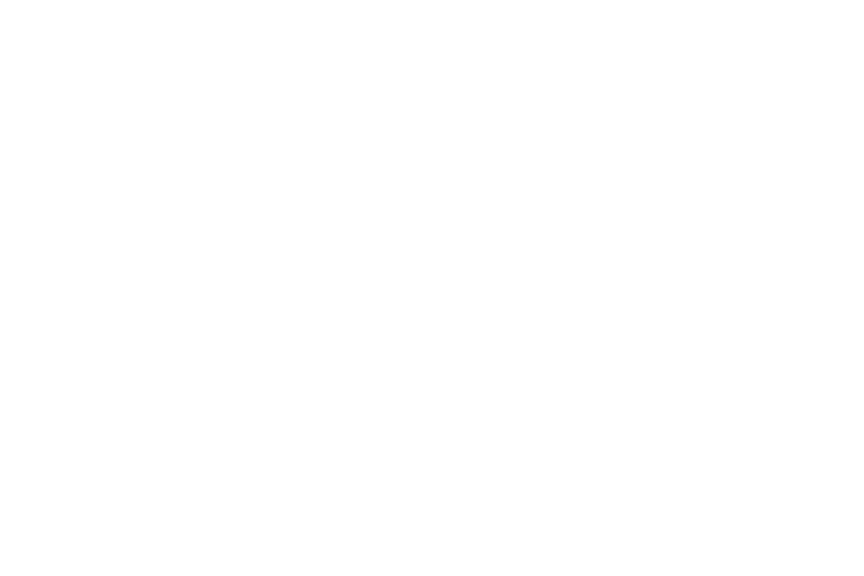

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


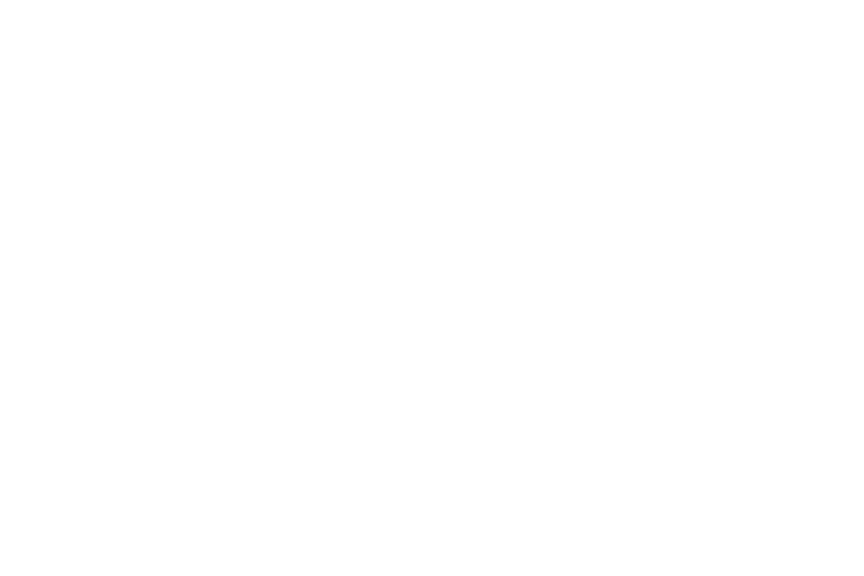

In [29]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [30]:
#### Turn-off automation
#
#%matplotlib notebook
%matplotlib inline

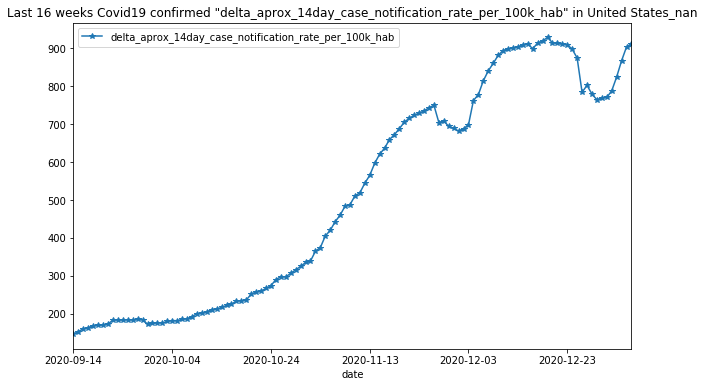

In [31]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

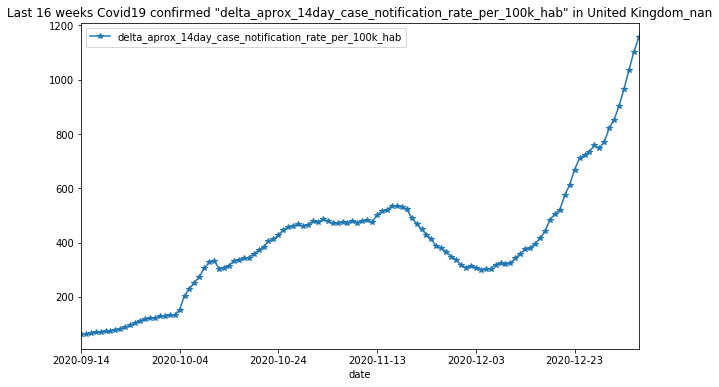

In [32]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [33]:
region='South Africa_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [34]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

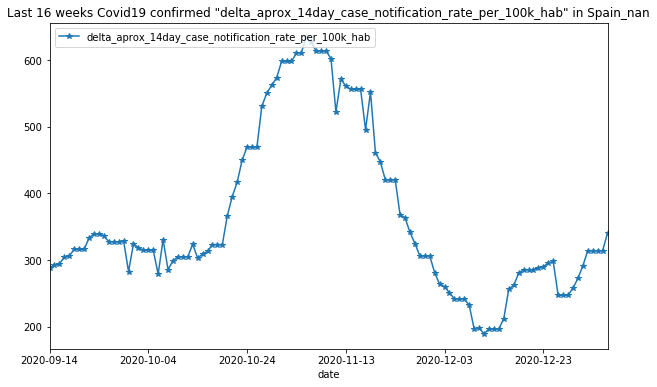

In [35]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

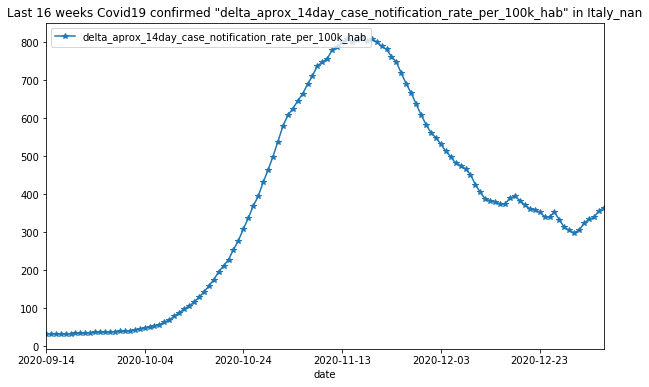

In [36]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

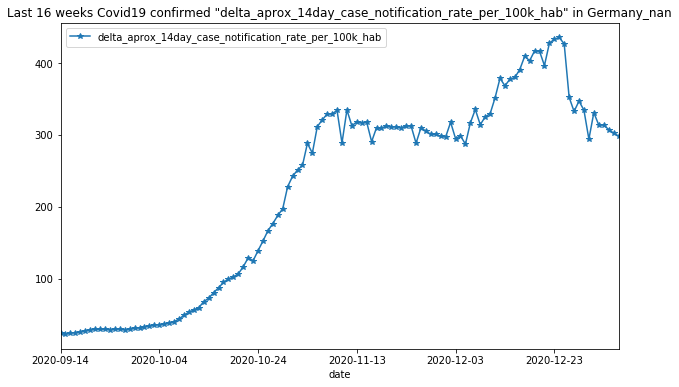

In [37]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

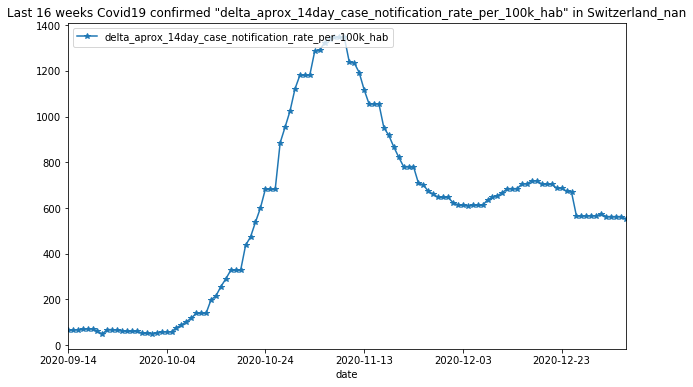

In [38]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [39]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

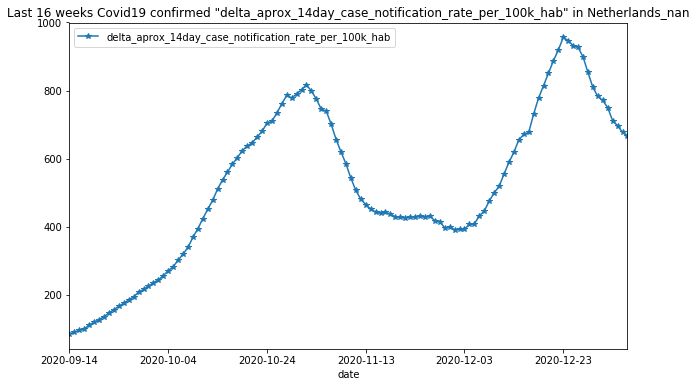

In [40]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [41]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

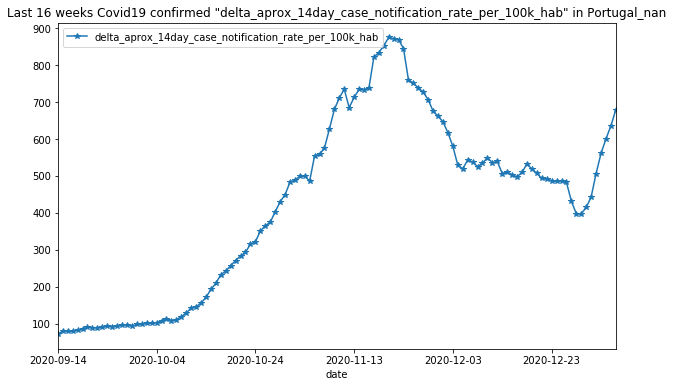

In [42]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [43]:
#%matplotlib notebook
#%matplotlib inline

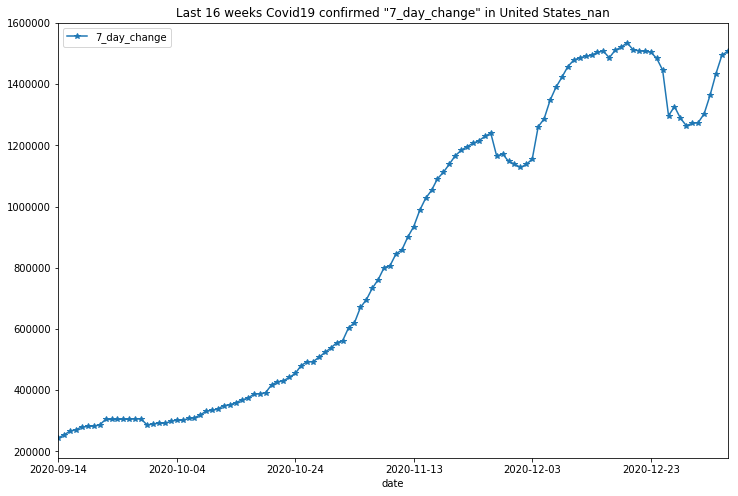

In [44]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

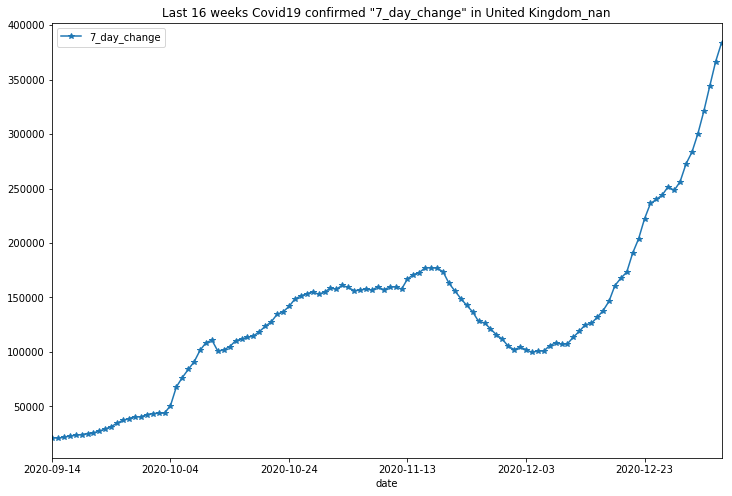

In [45]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [46]:
region='South Africa_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [47]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

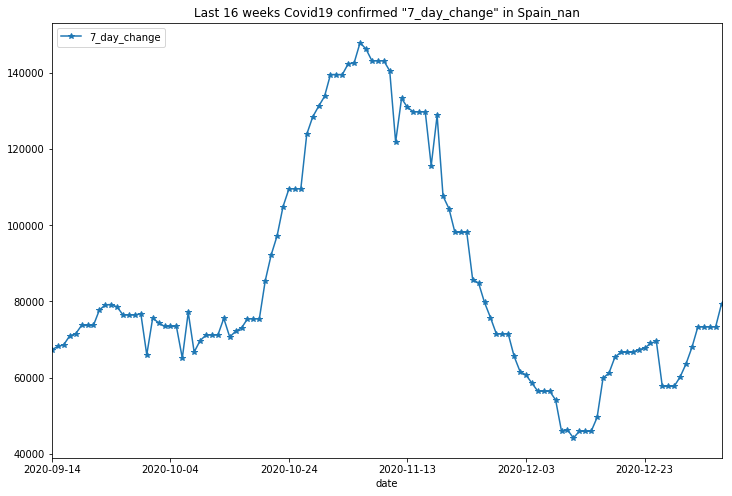

In [48]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

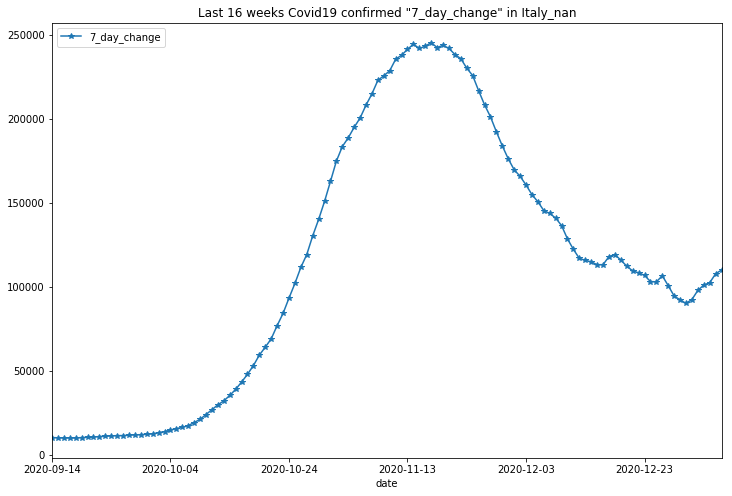

In [49]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

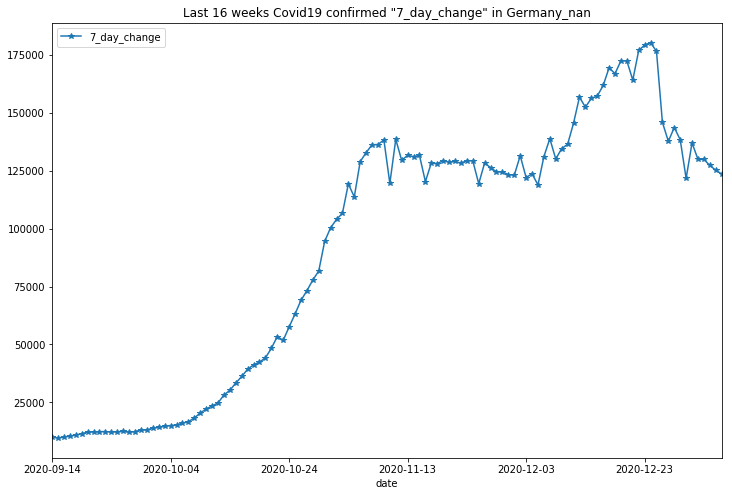

In [50]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

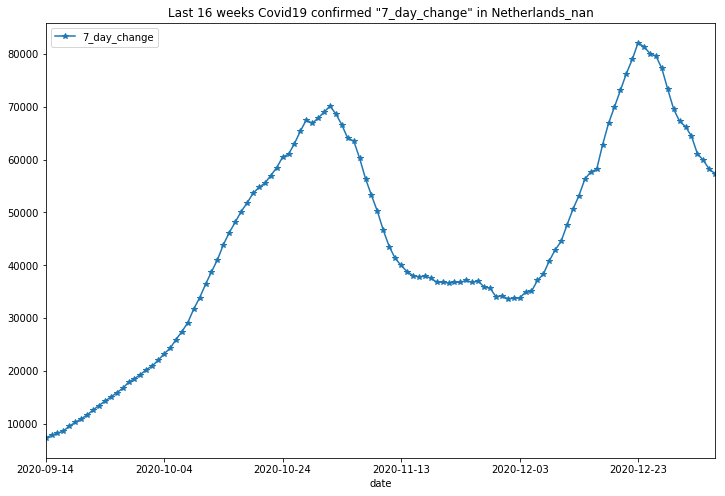

In [51]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

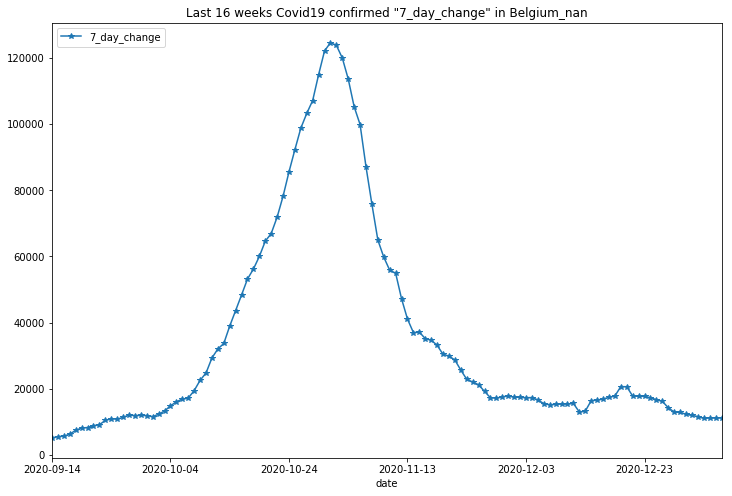

In [52]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [53]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

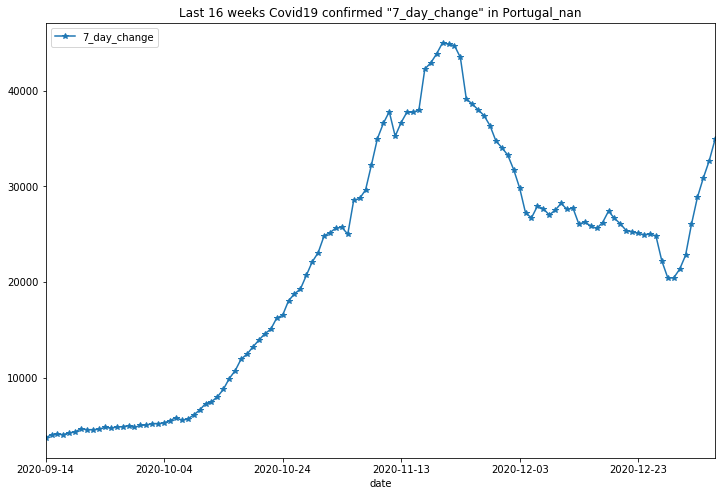

In [54]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [55]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


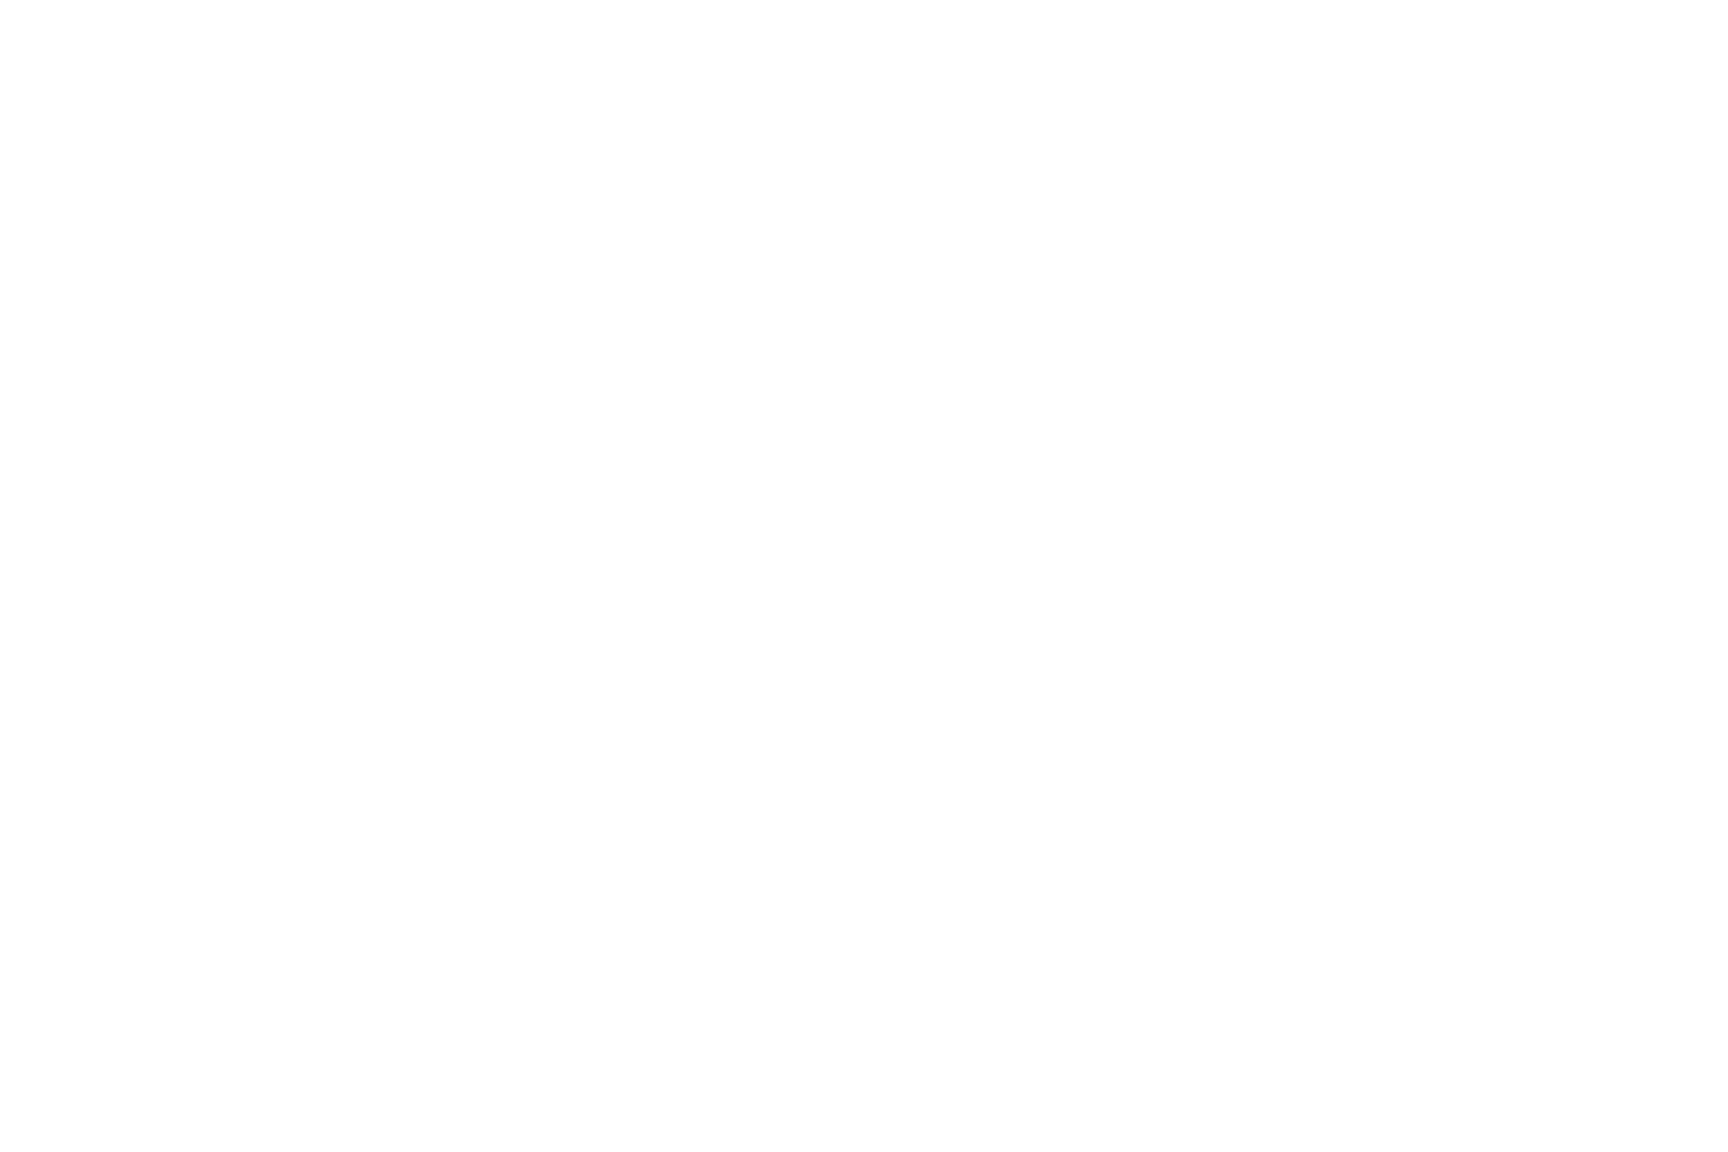

<IPython.core.display.Javascript object>


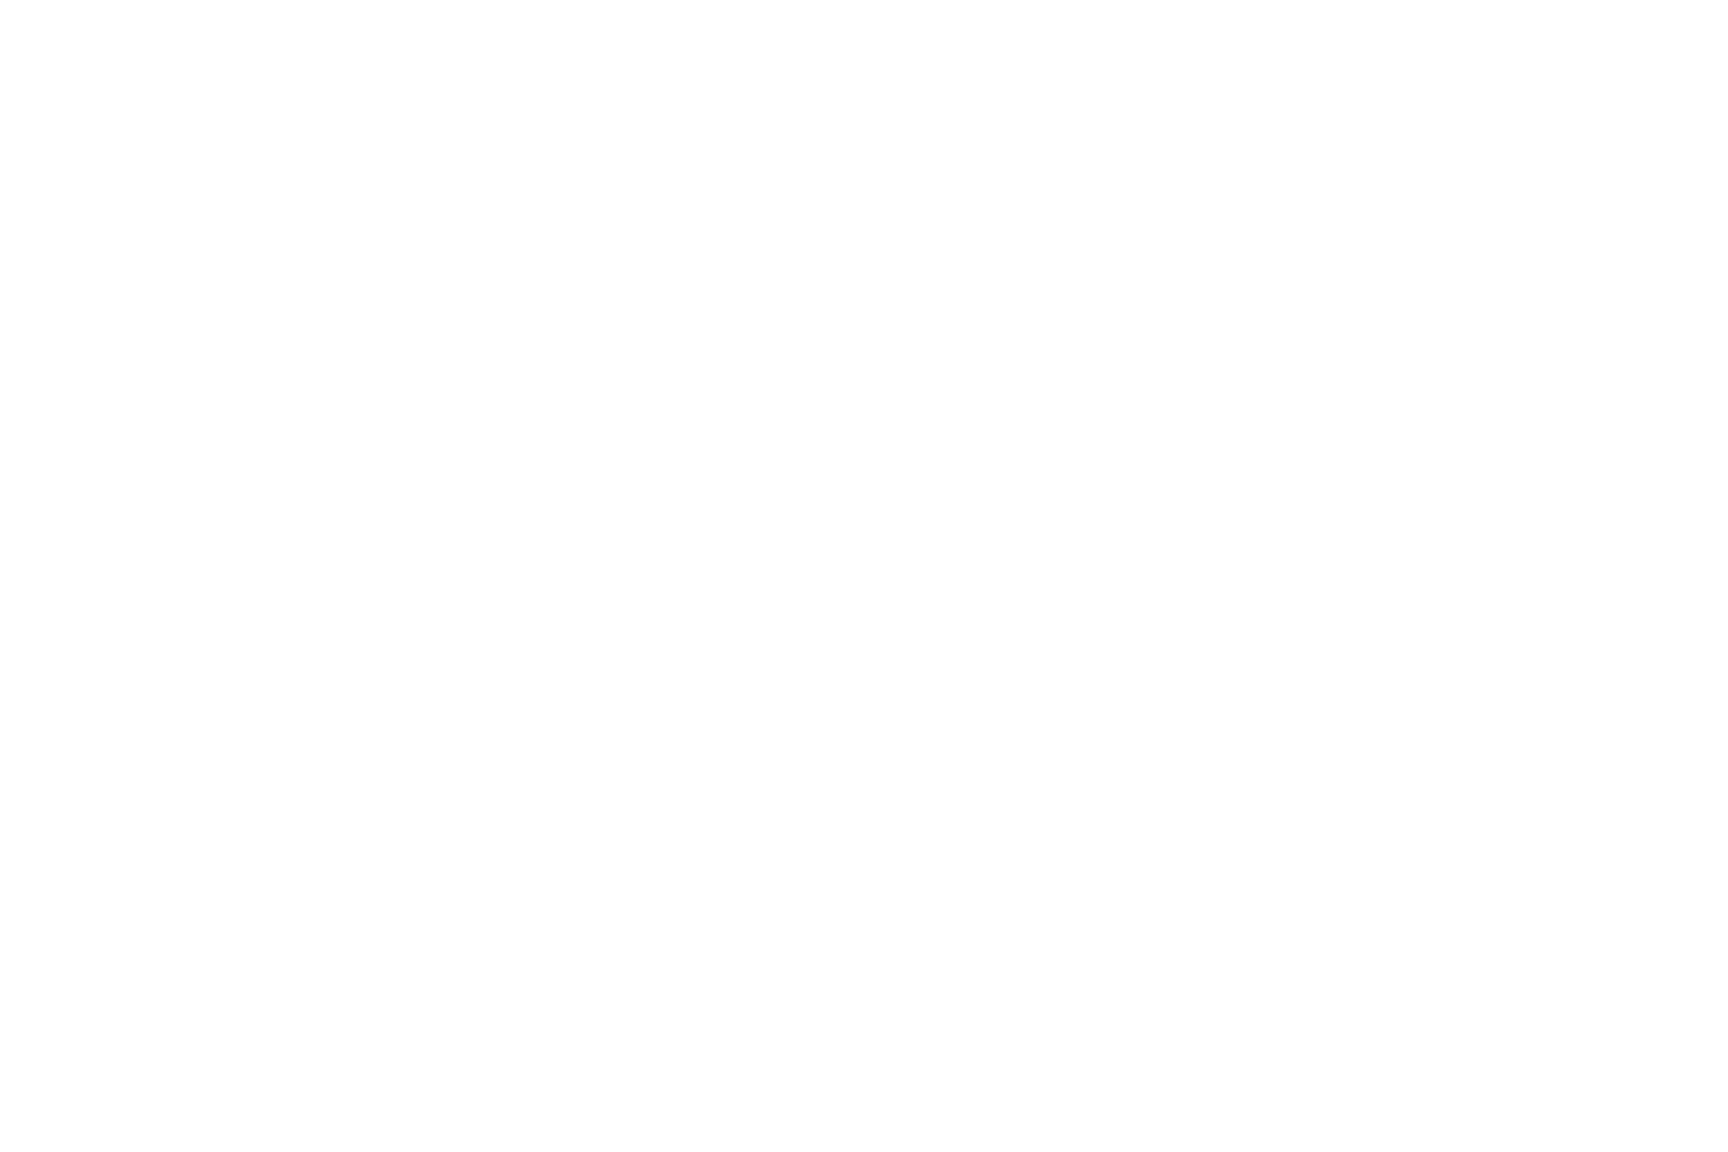

In [56]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


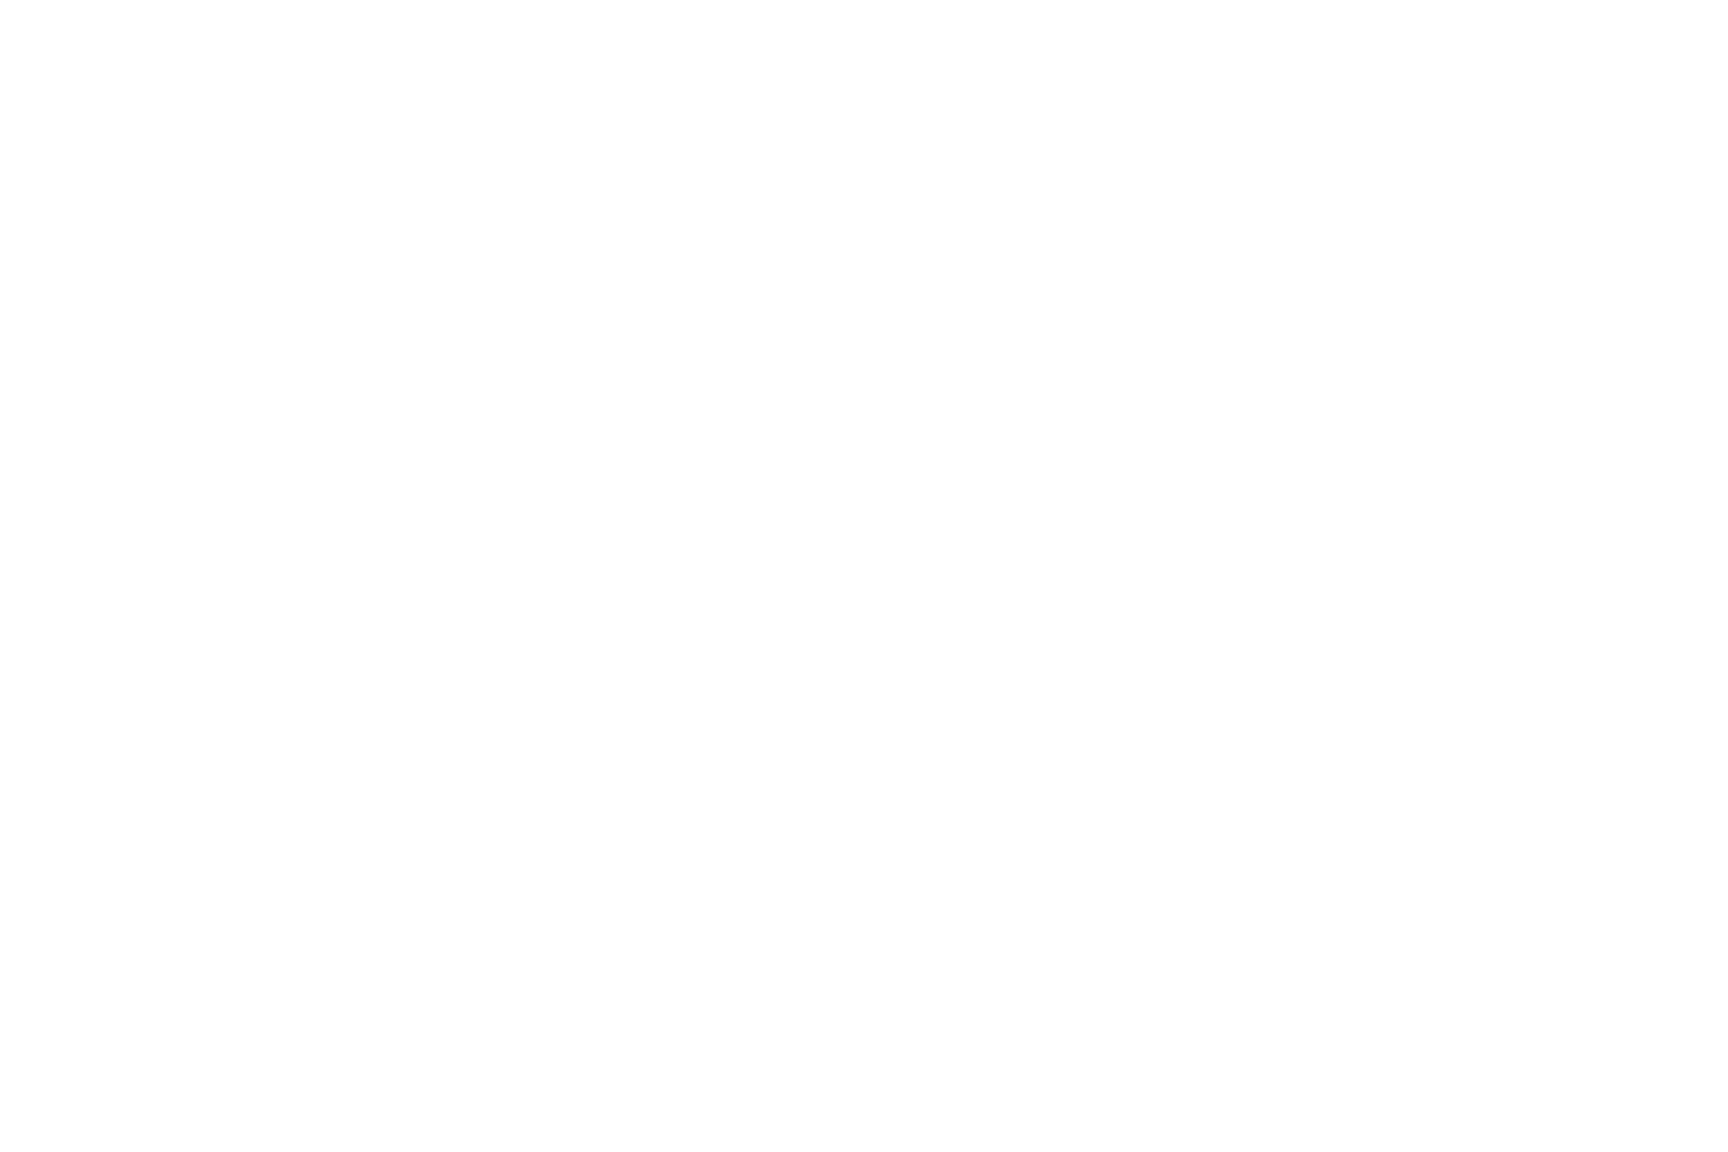

<IPython.core.display.Javascript object>


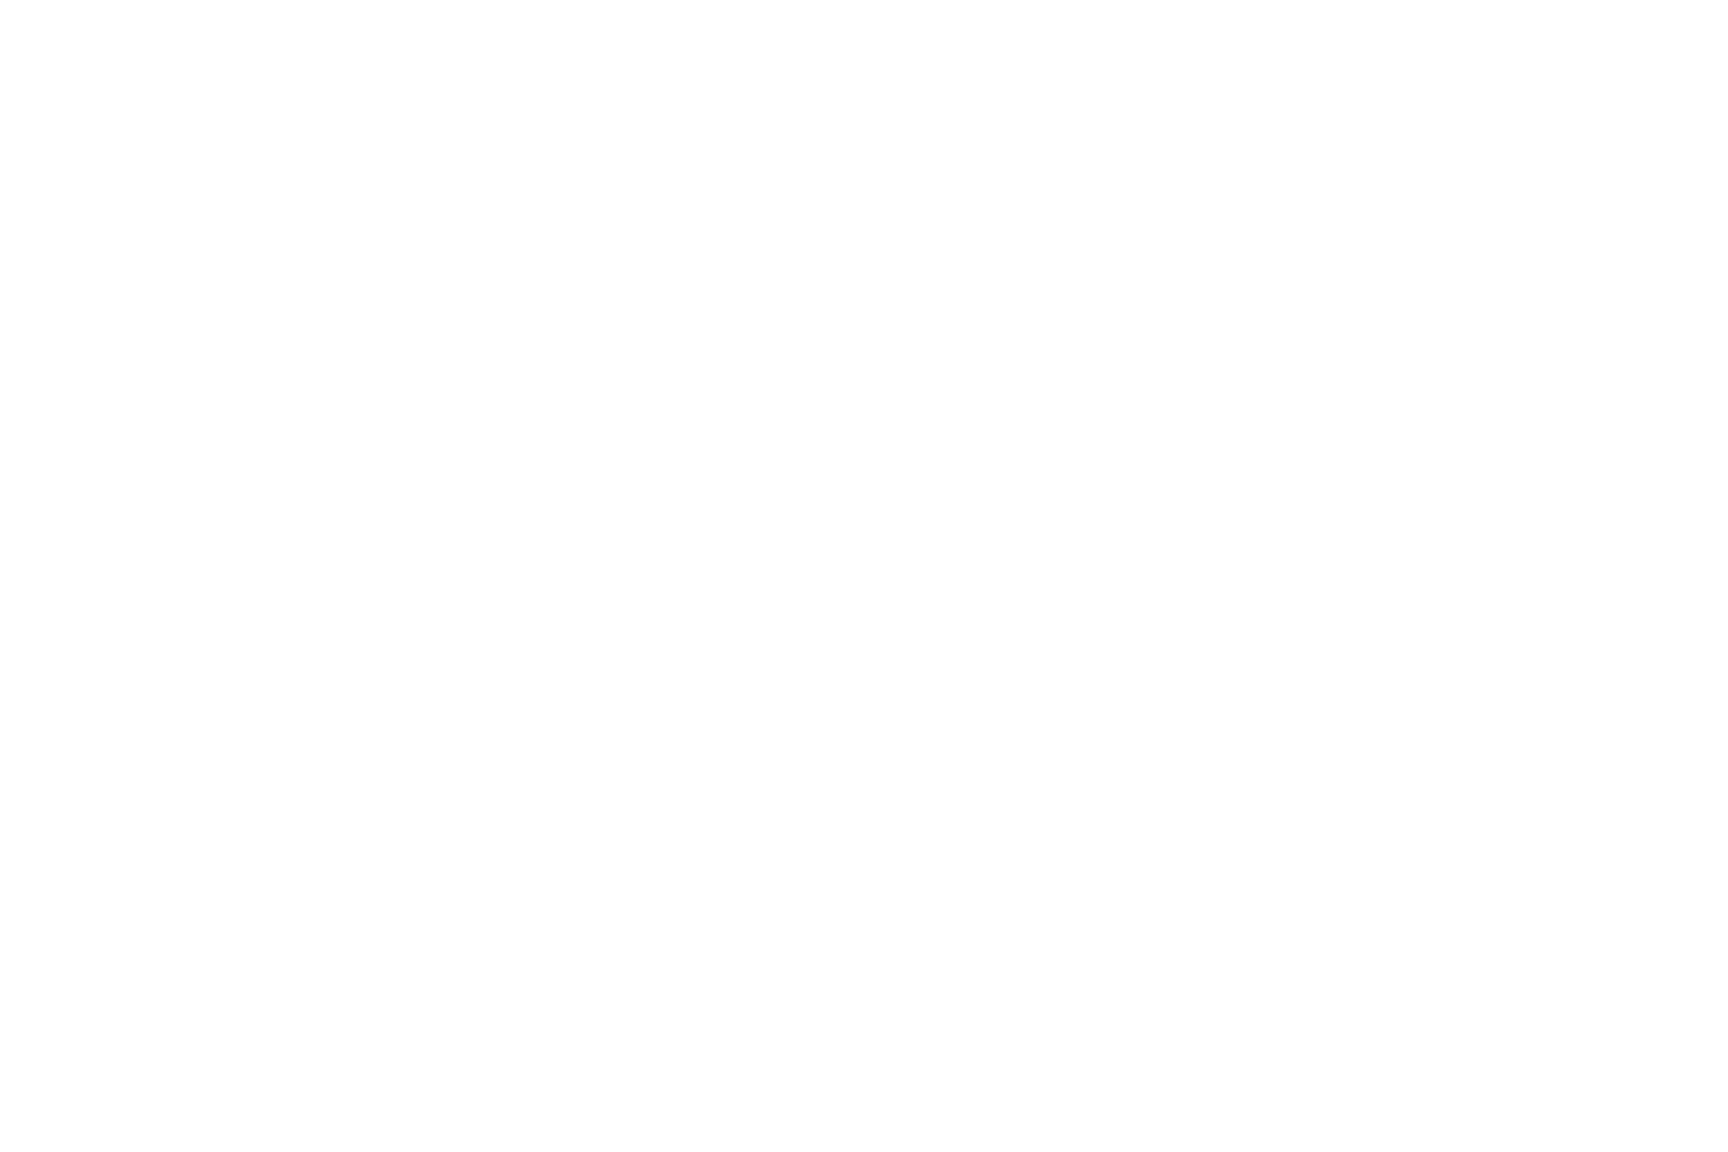

In [57]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


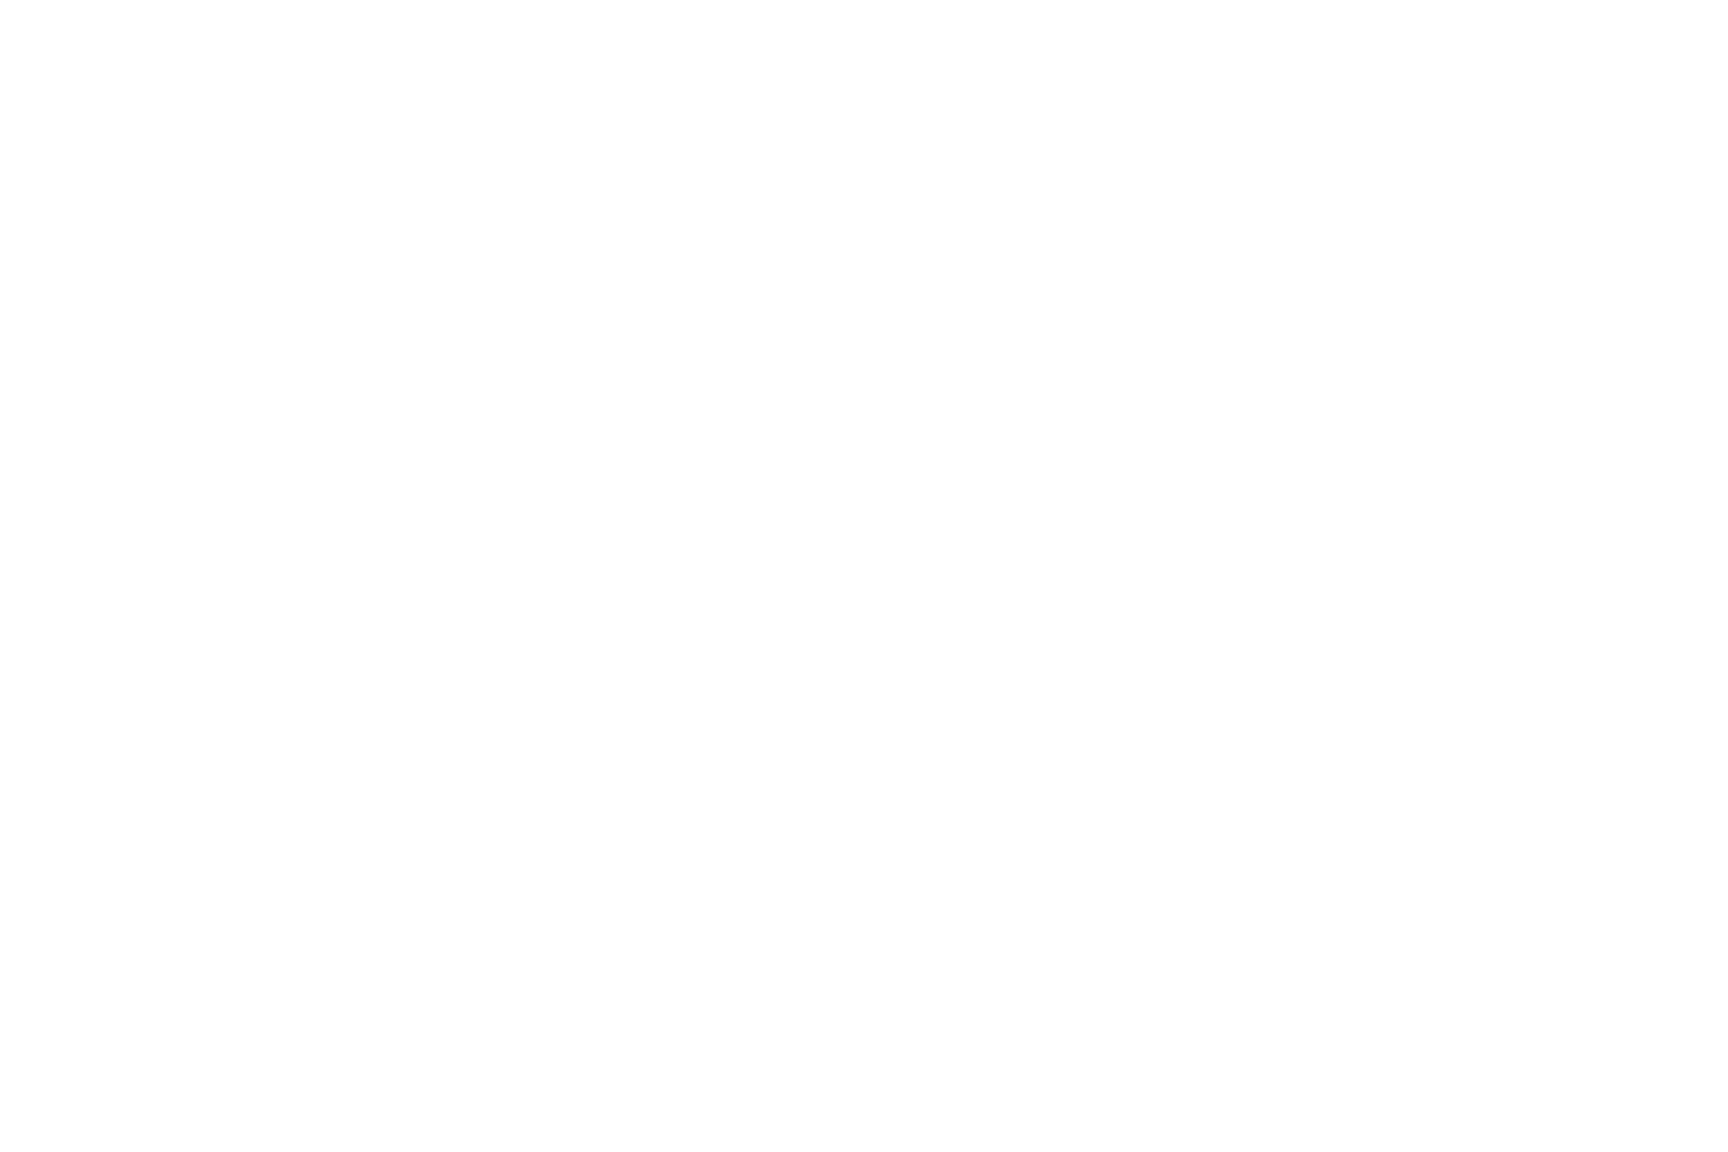

<IPython.core.display.Javascript object>


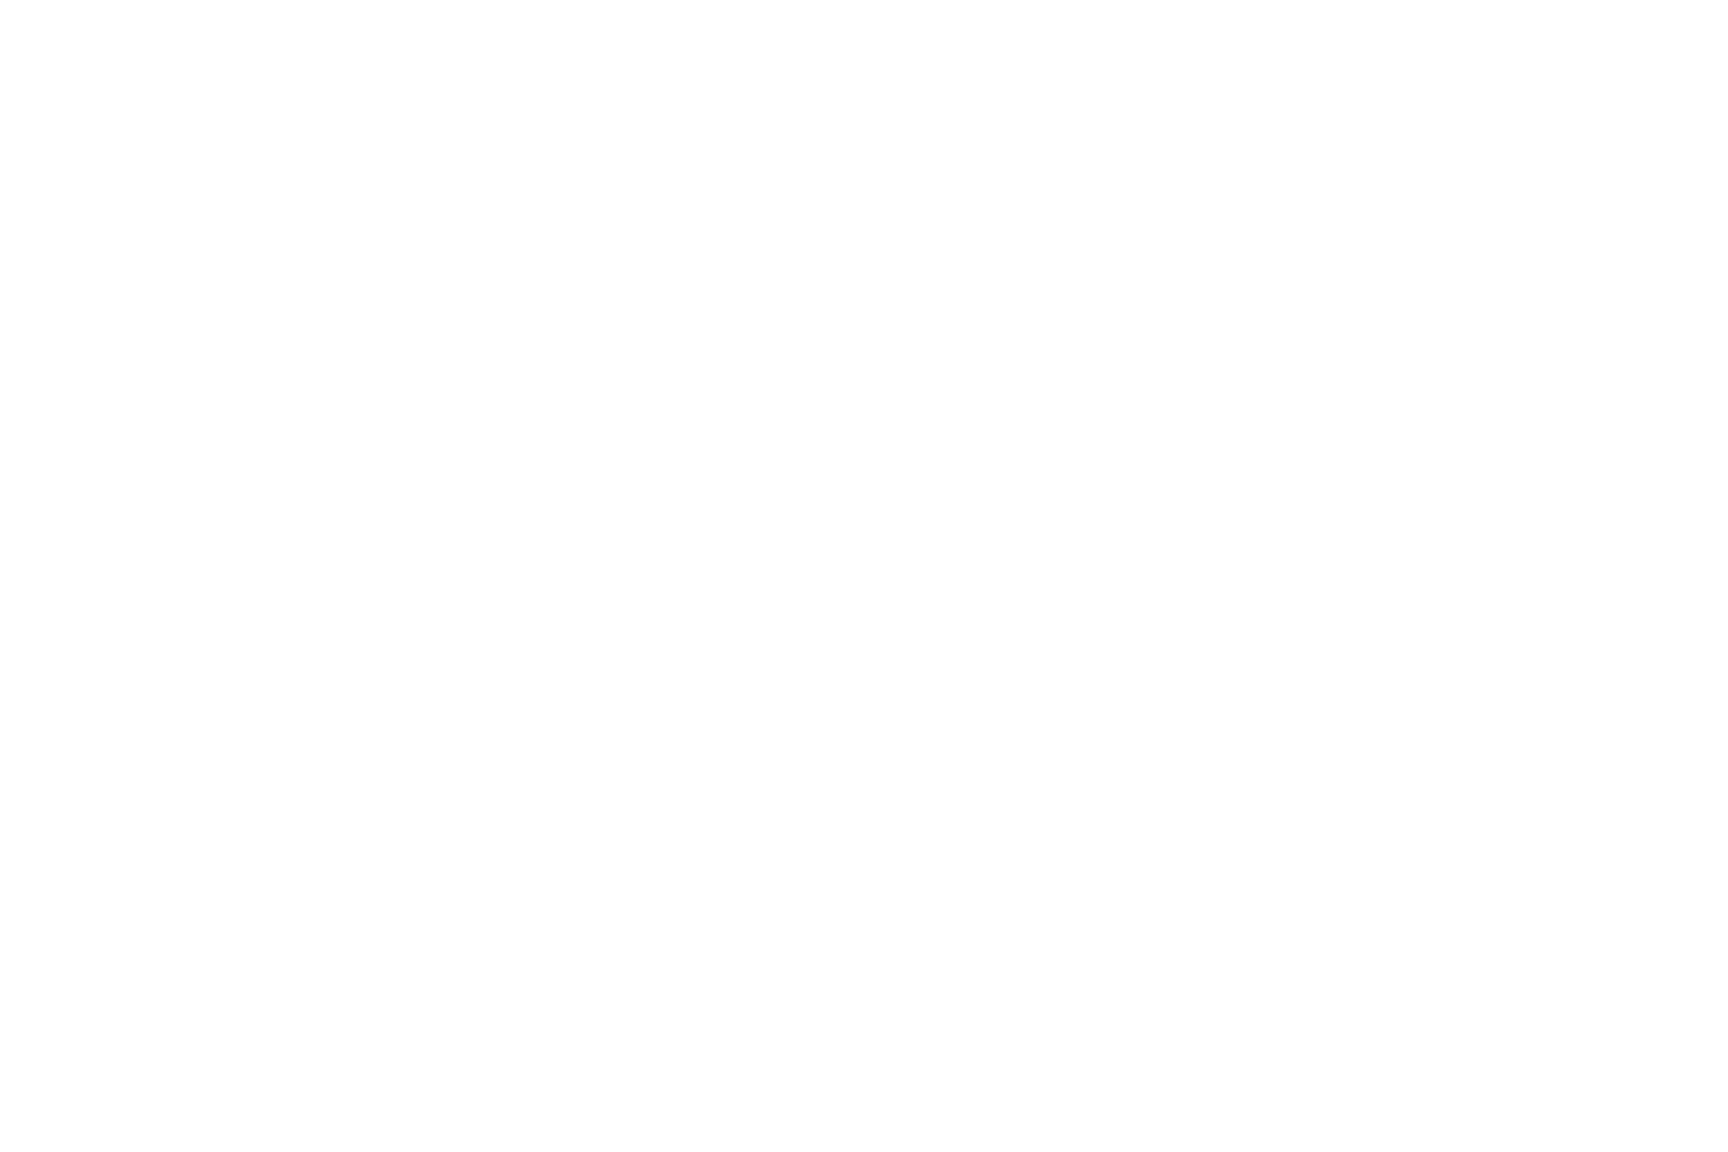

In [58]:
region='South Africa_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


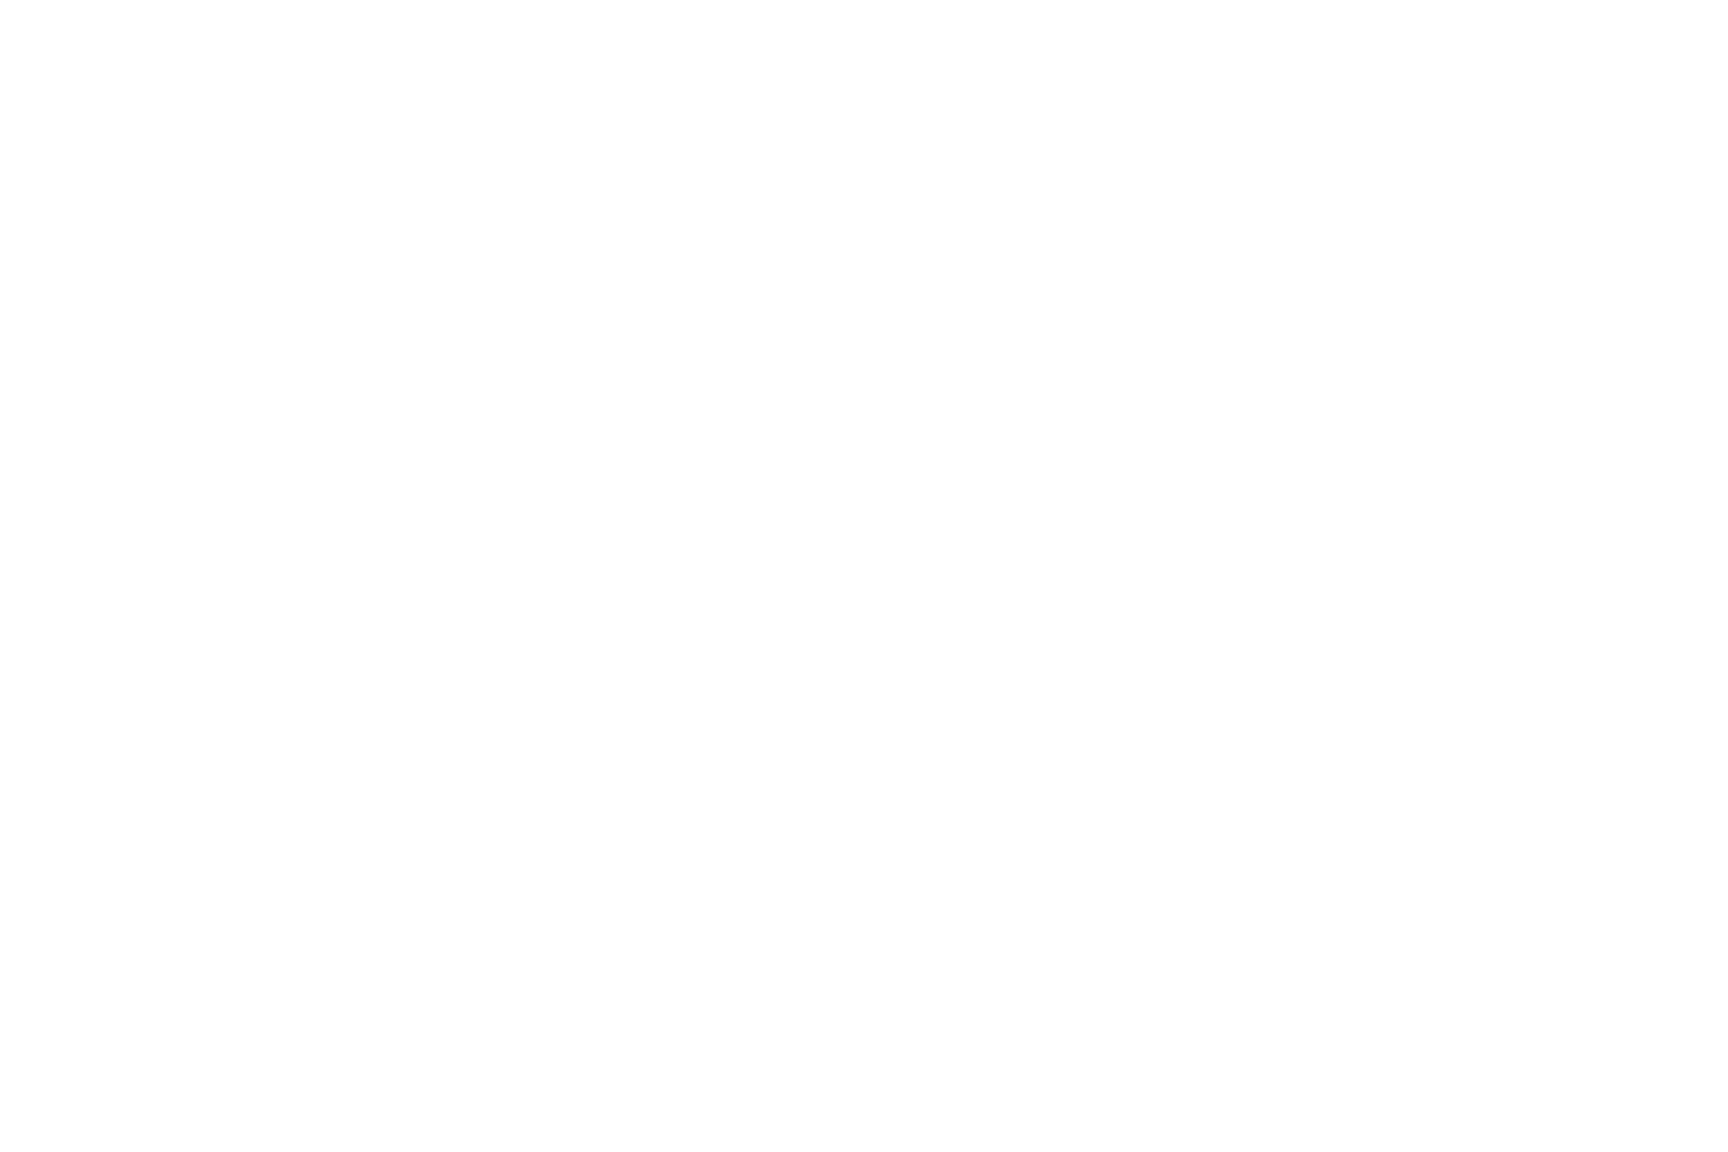

<IPython.core.display.Javascript object>


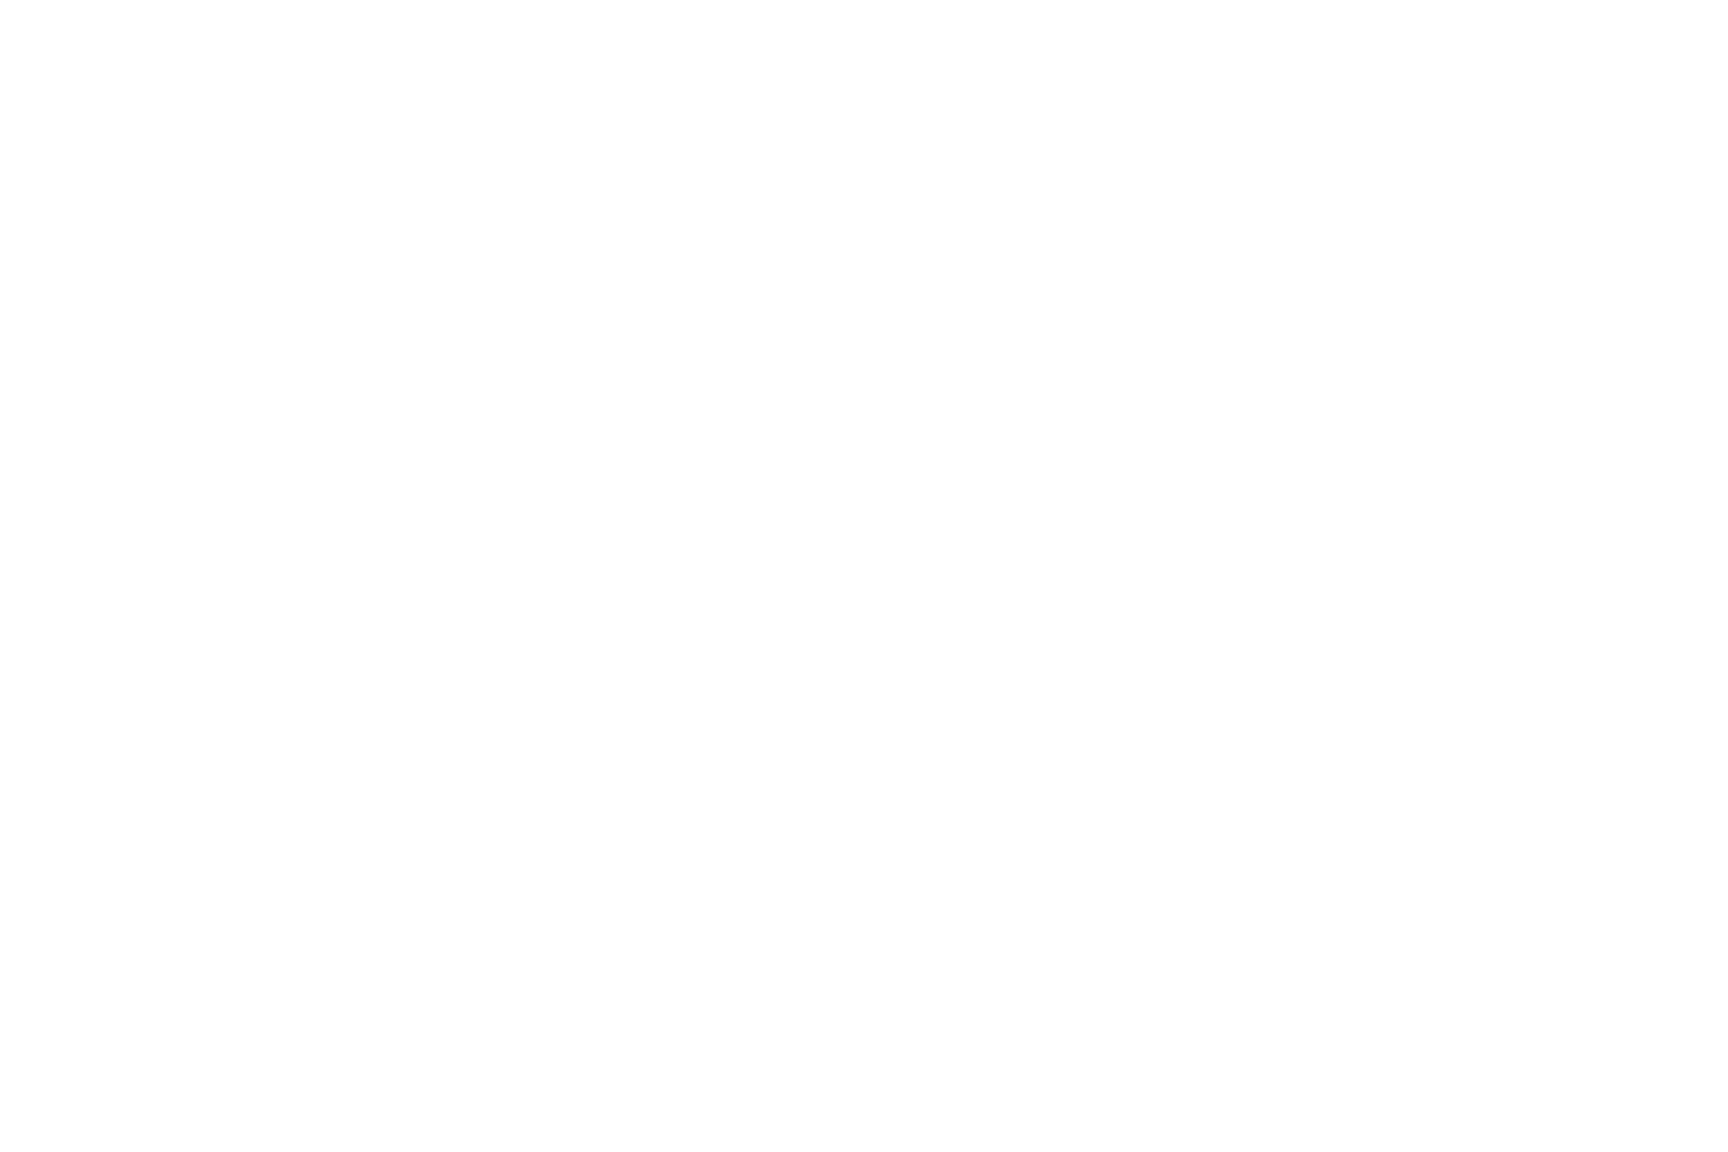

In [59]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


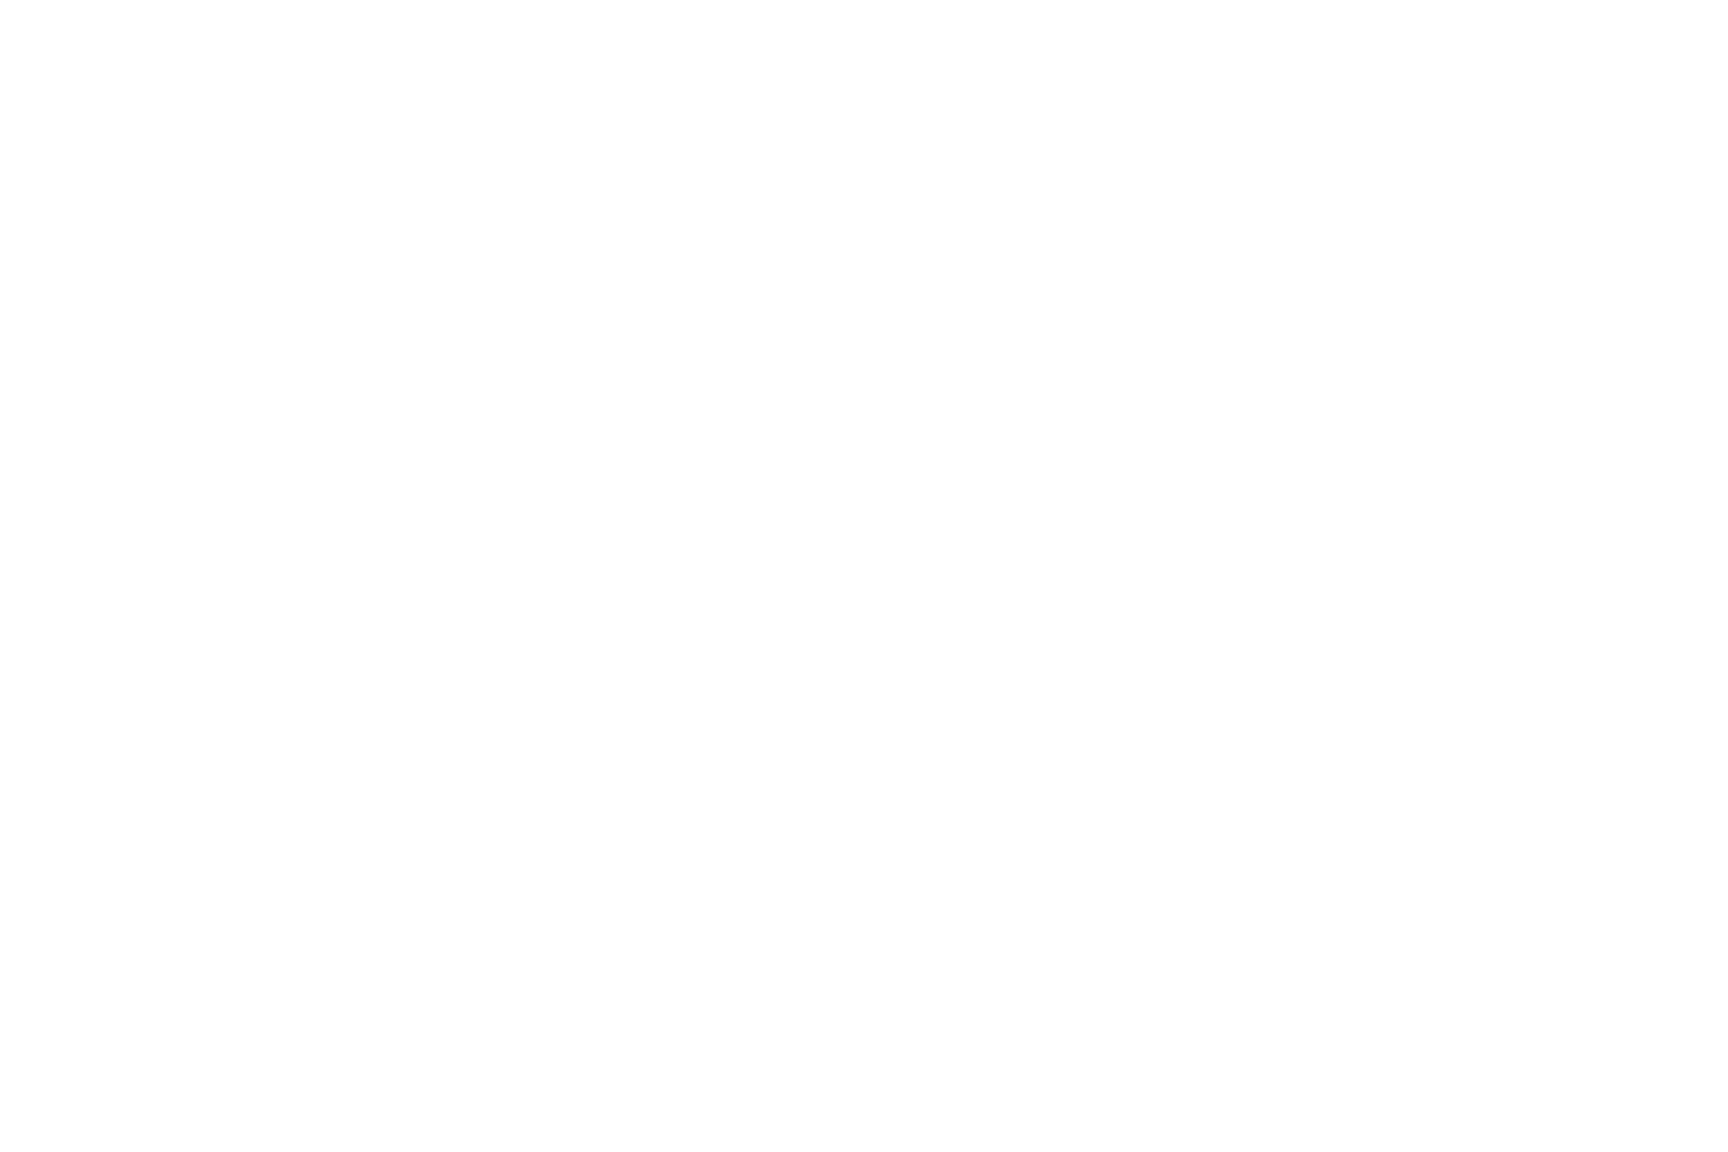

<IPython.core.display.Javascript object>


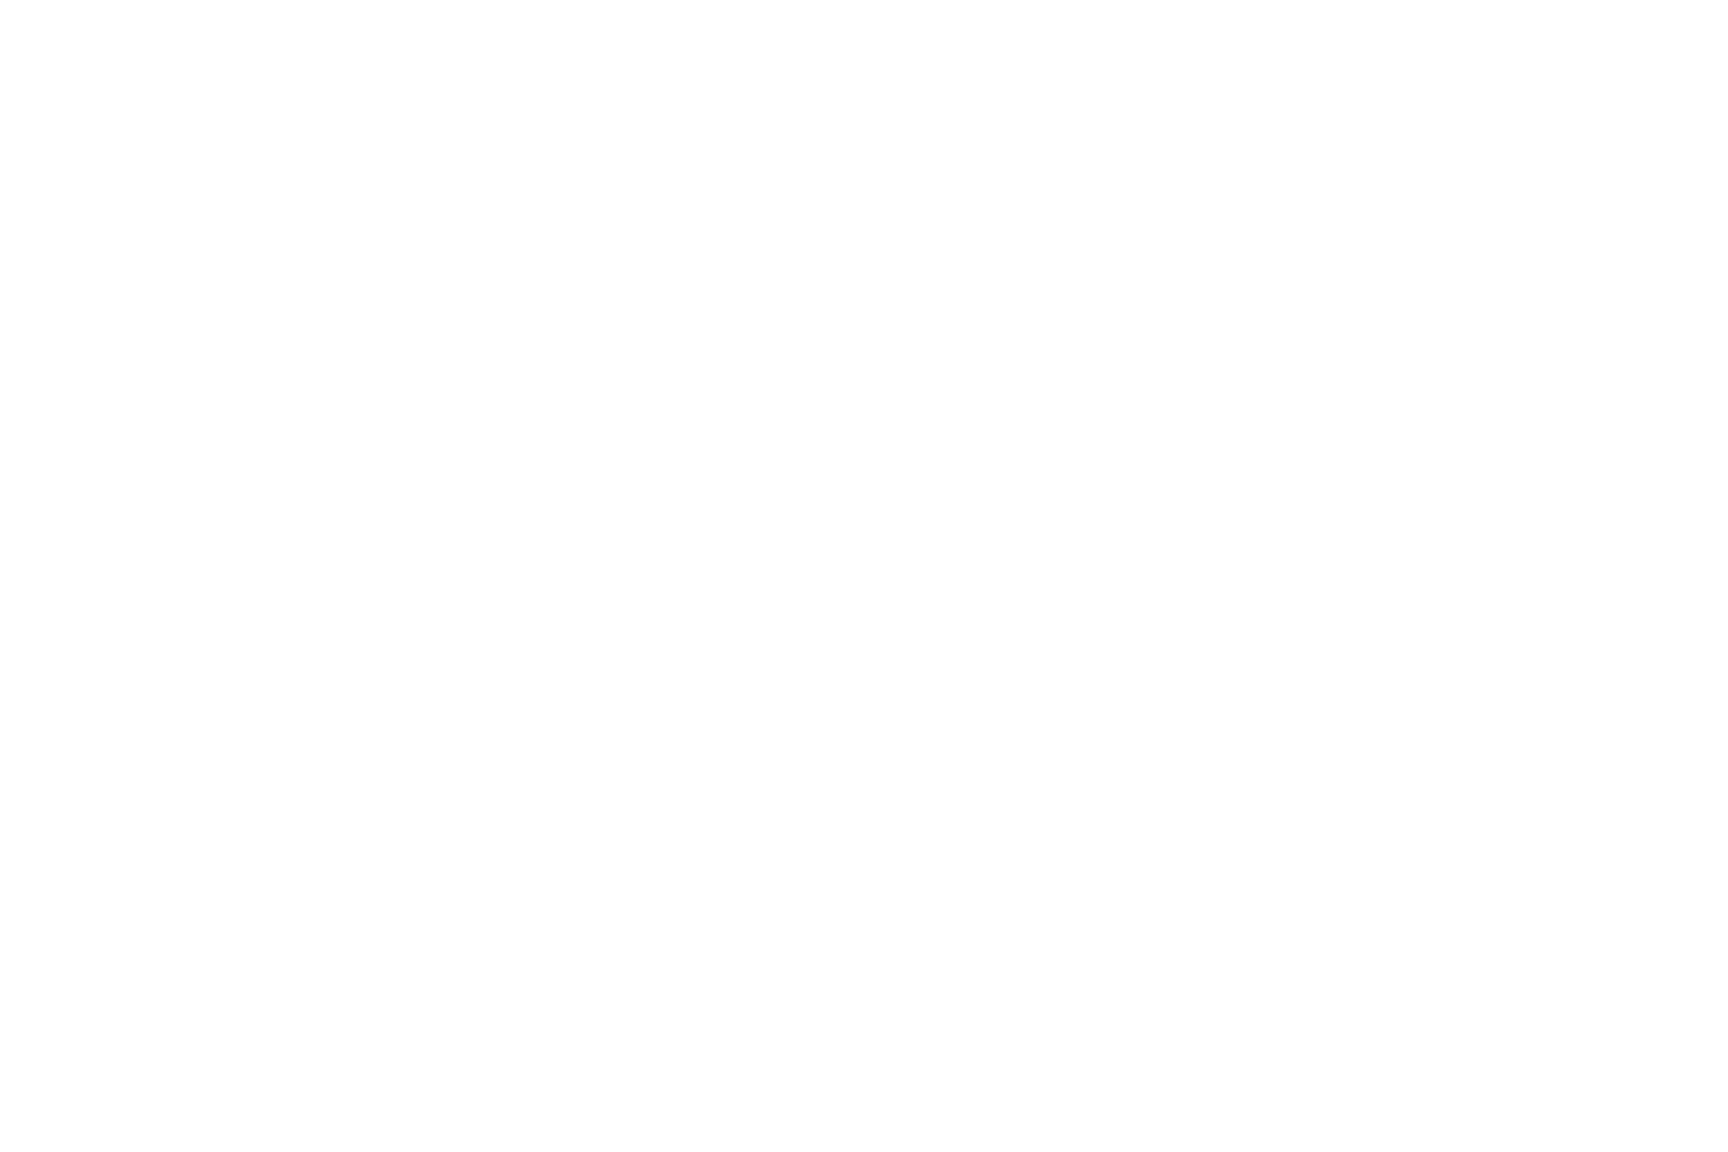

In [60]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


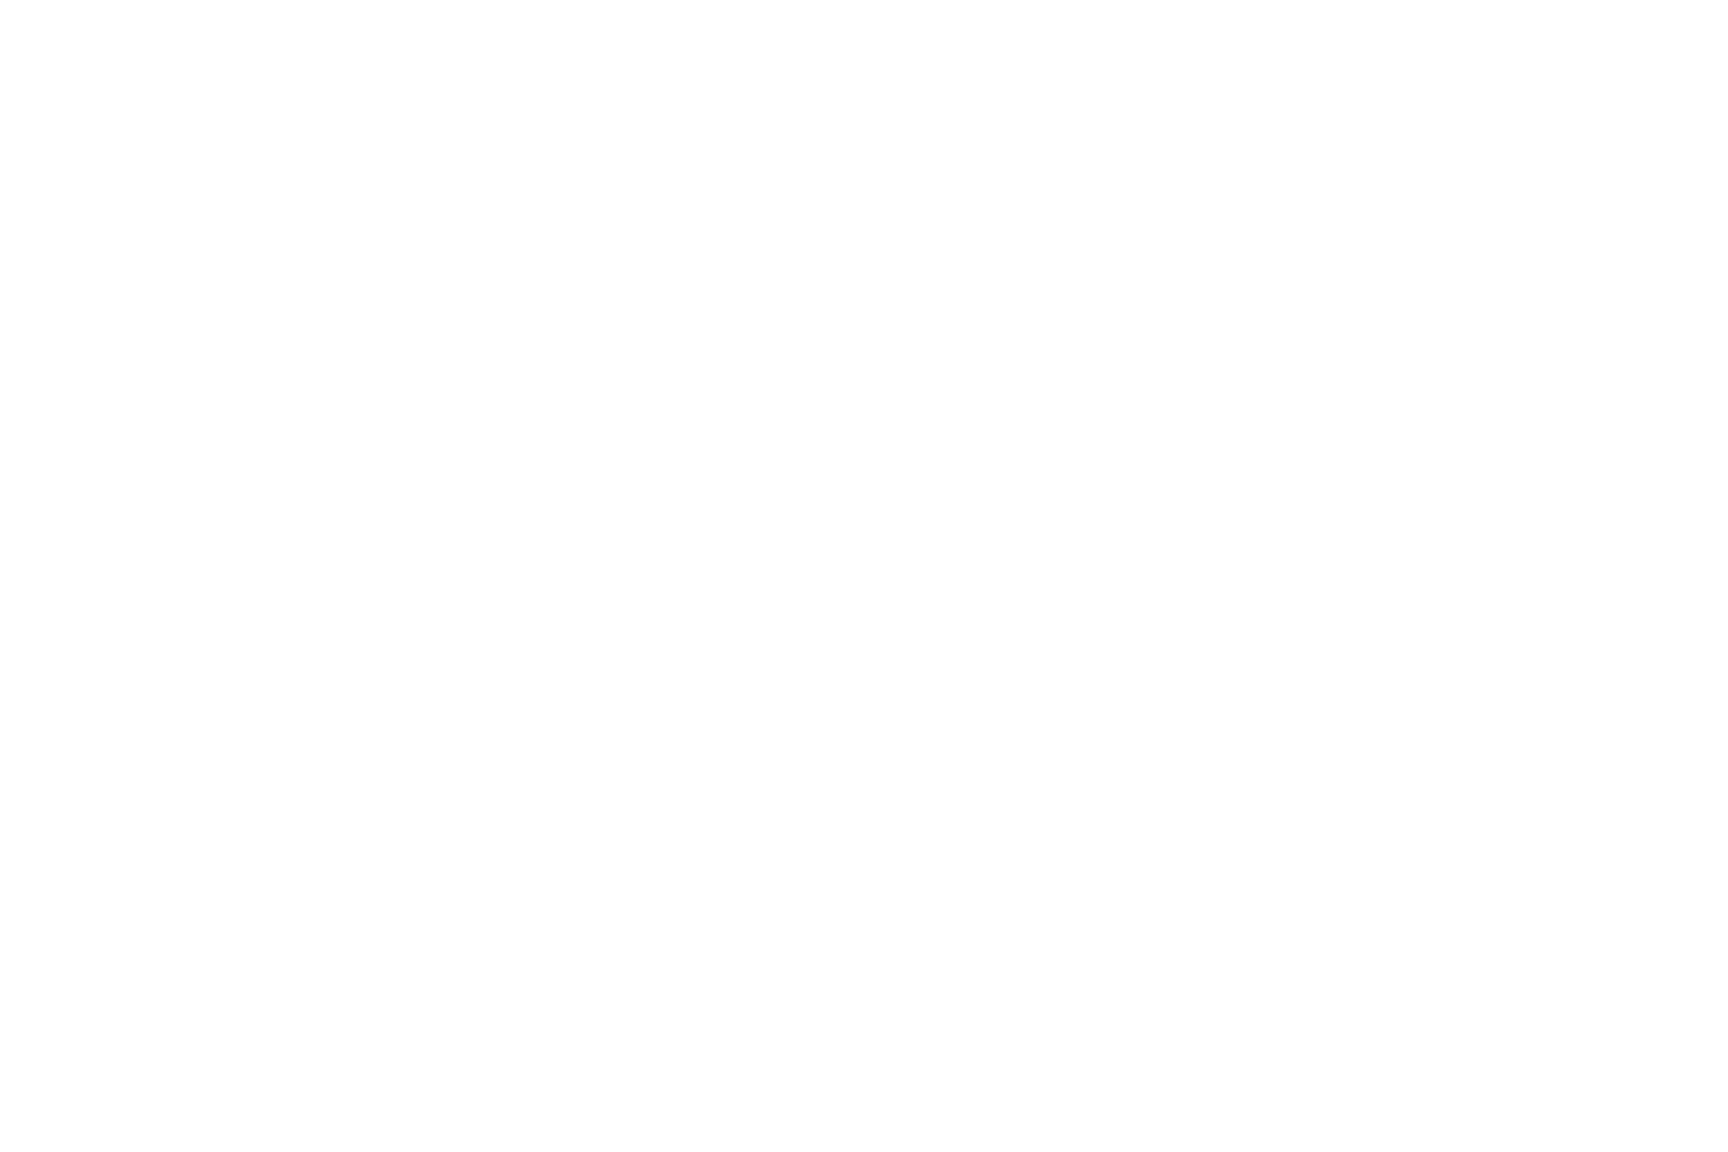

<IPython.core.display.Javascript object>


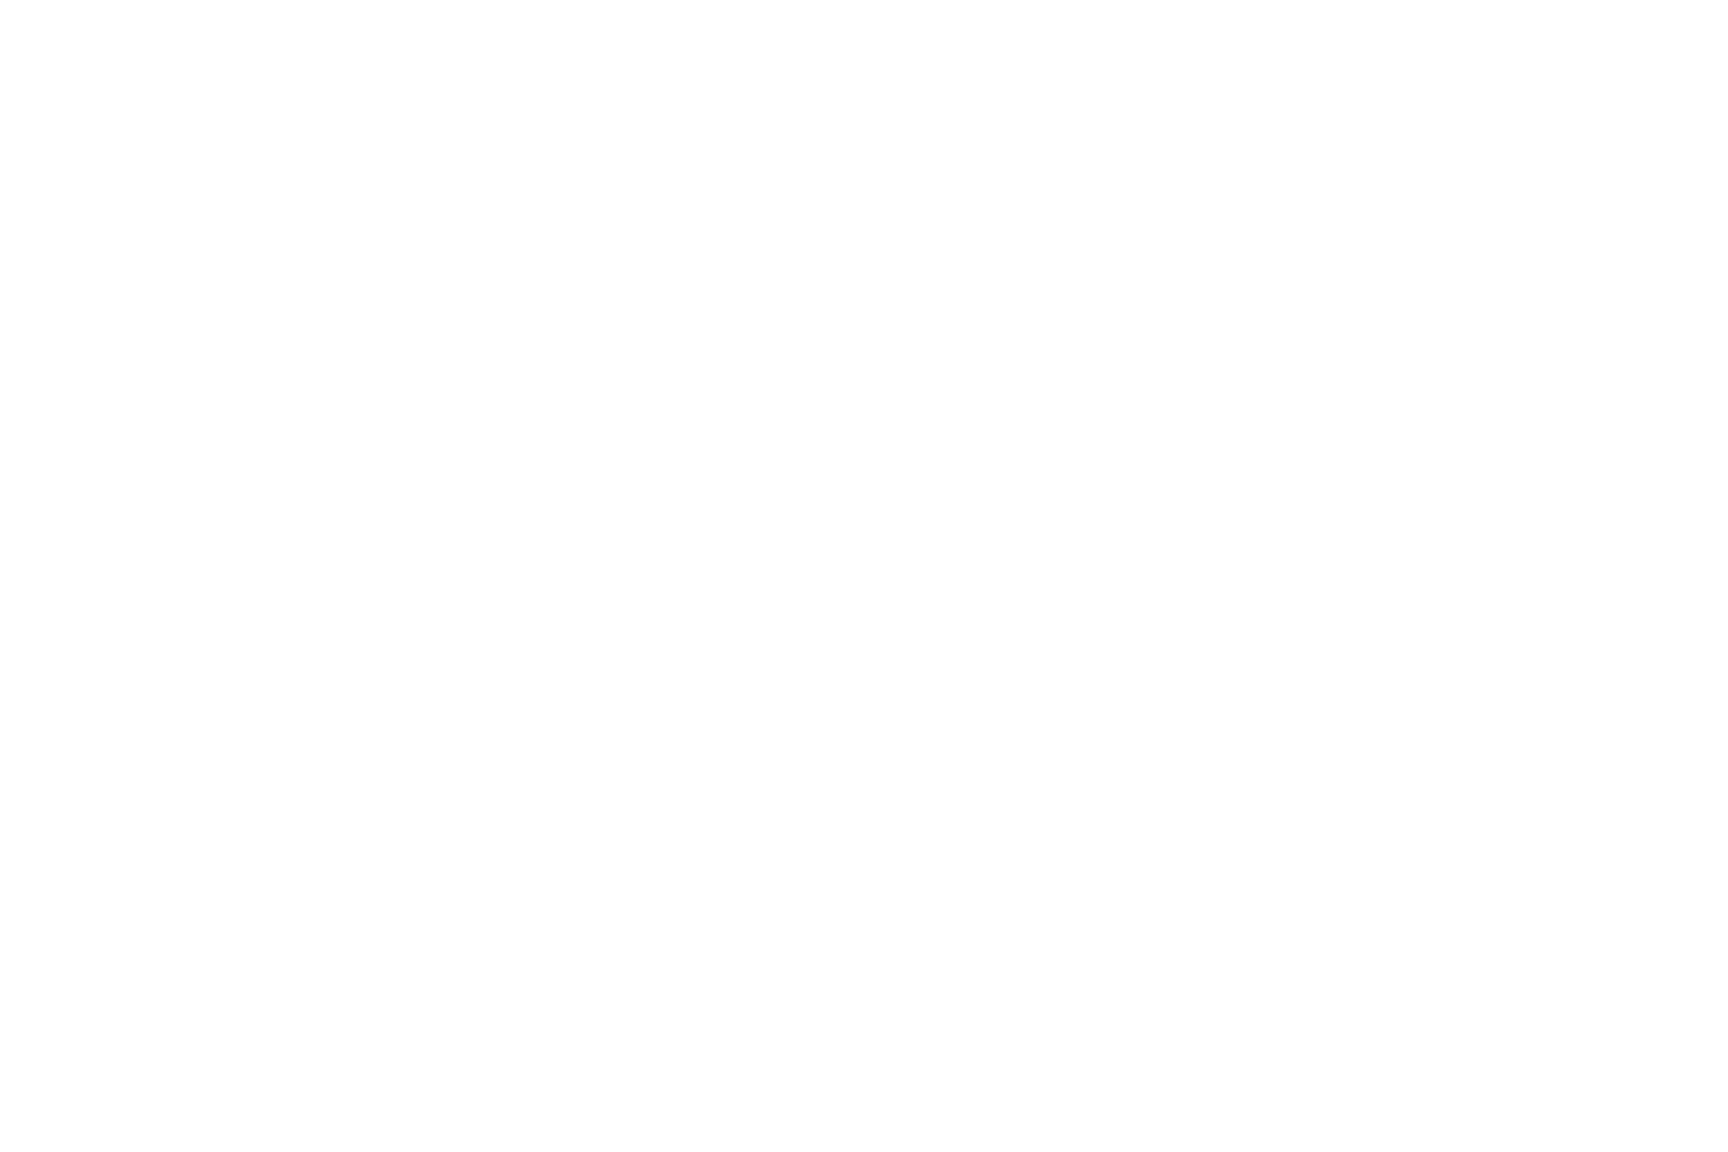

In [61]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


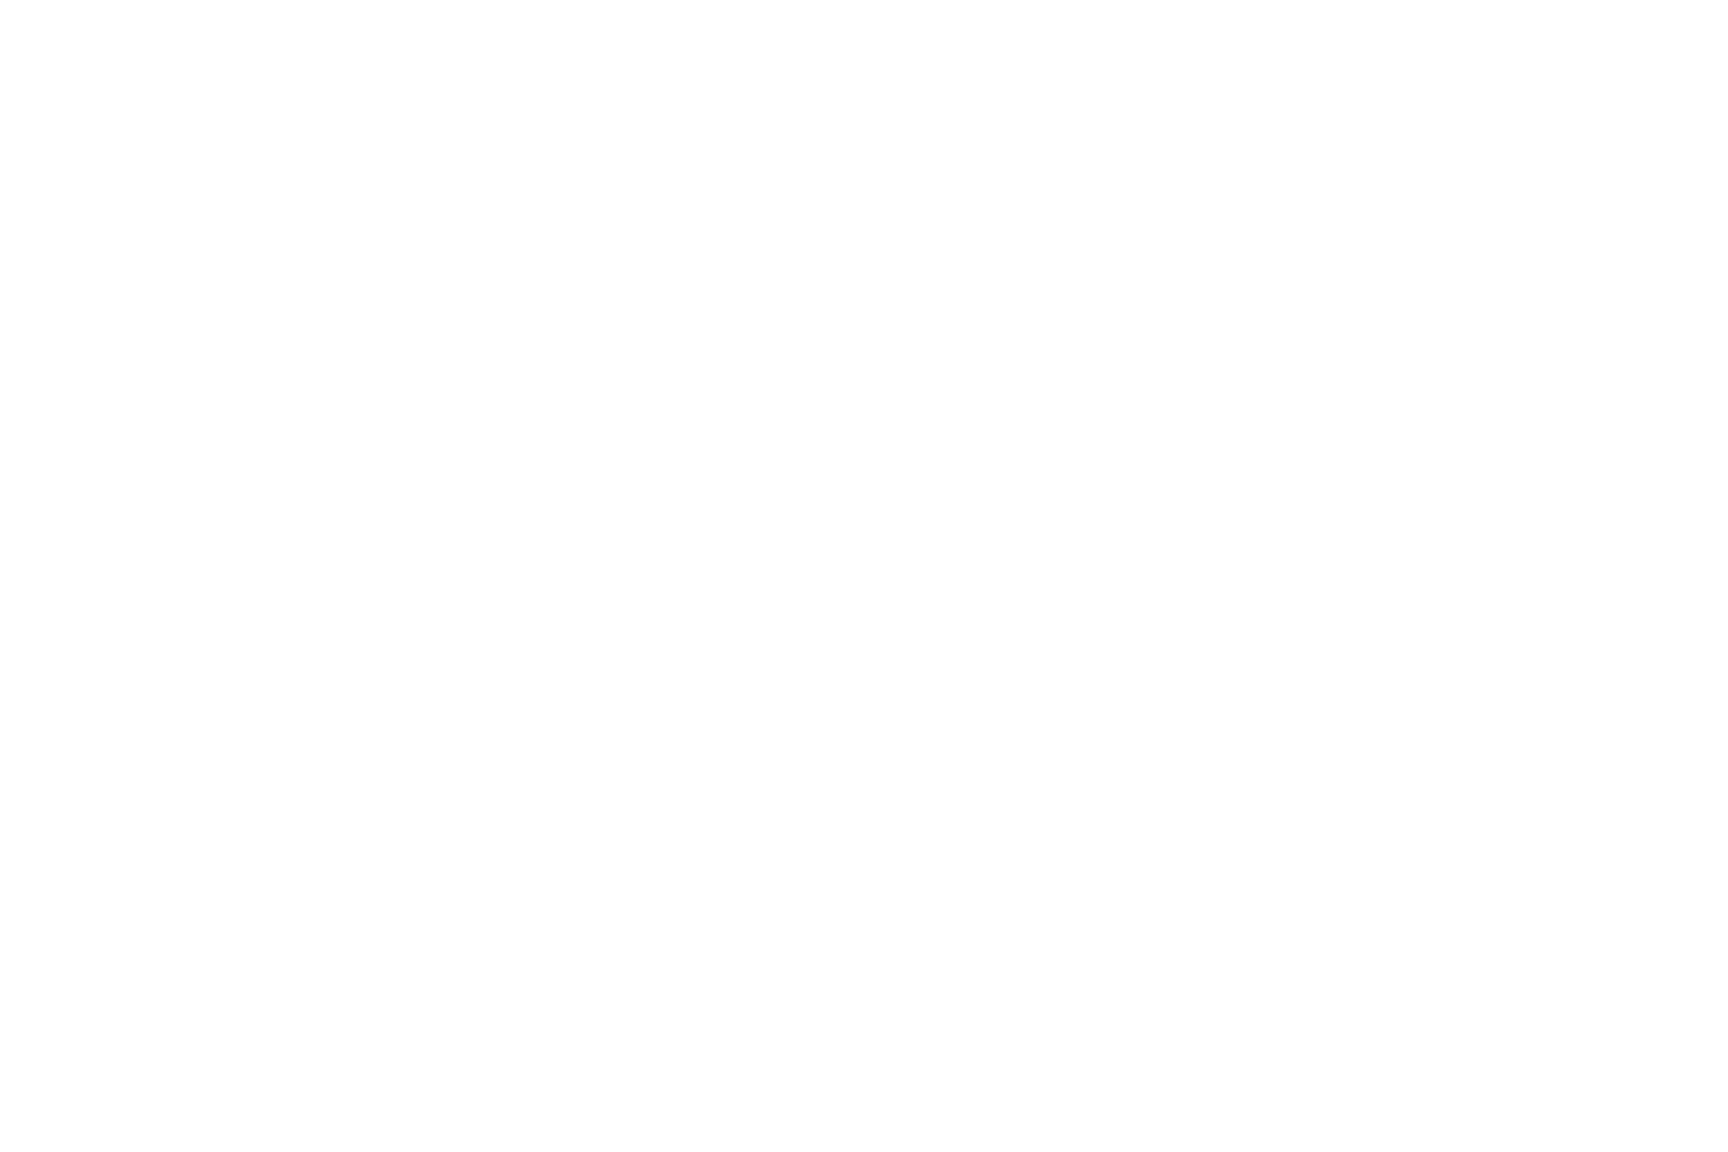

<IPython.core.display.Javascript object>


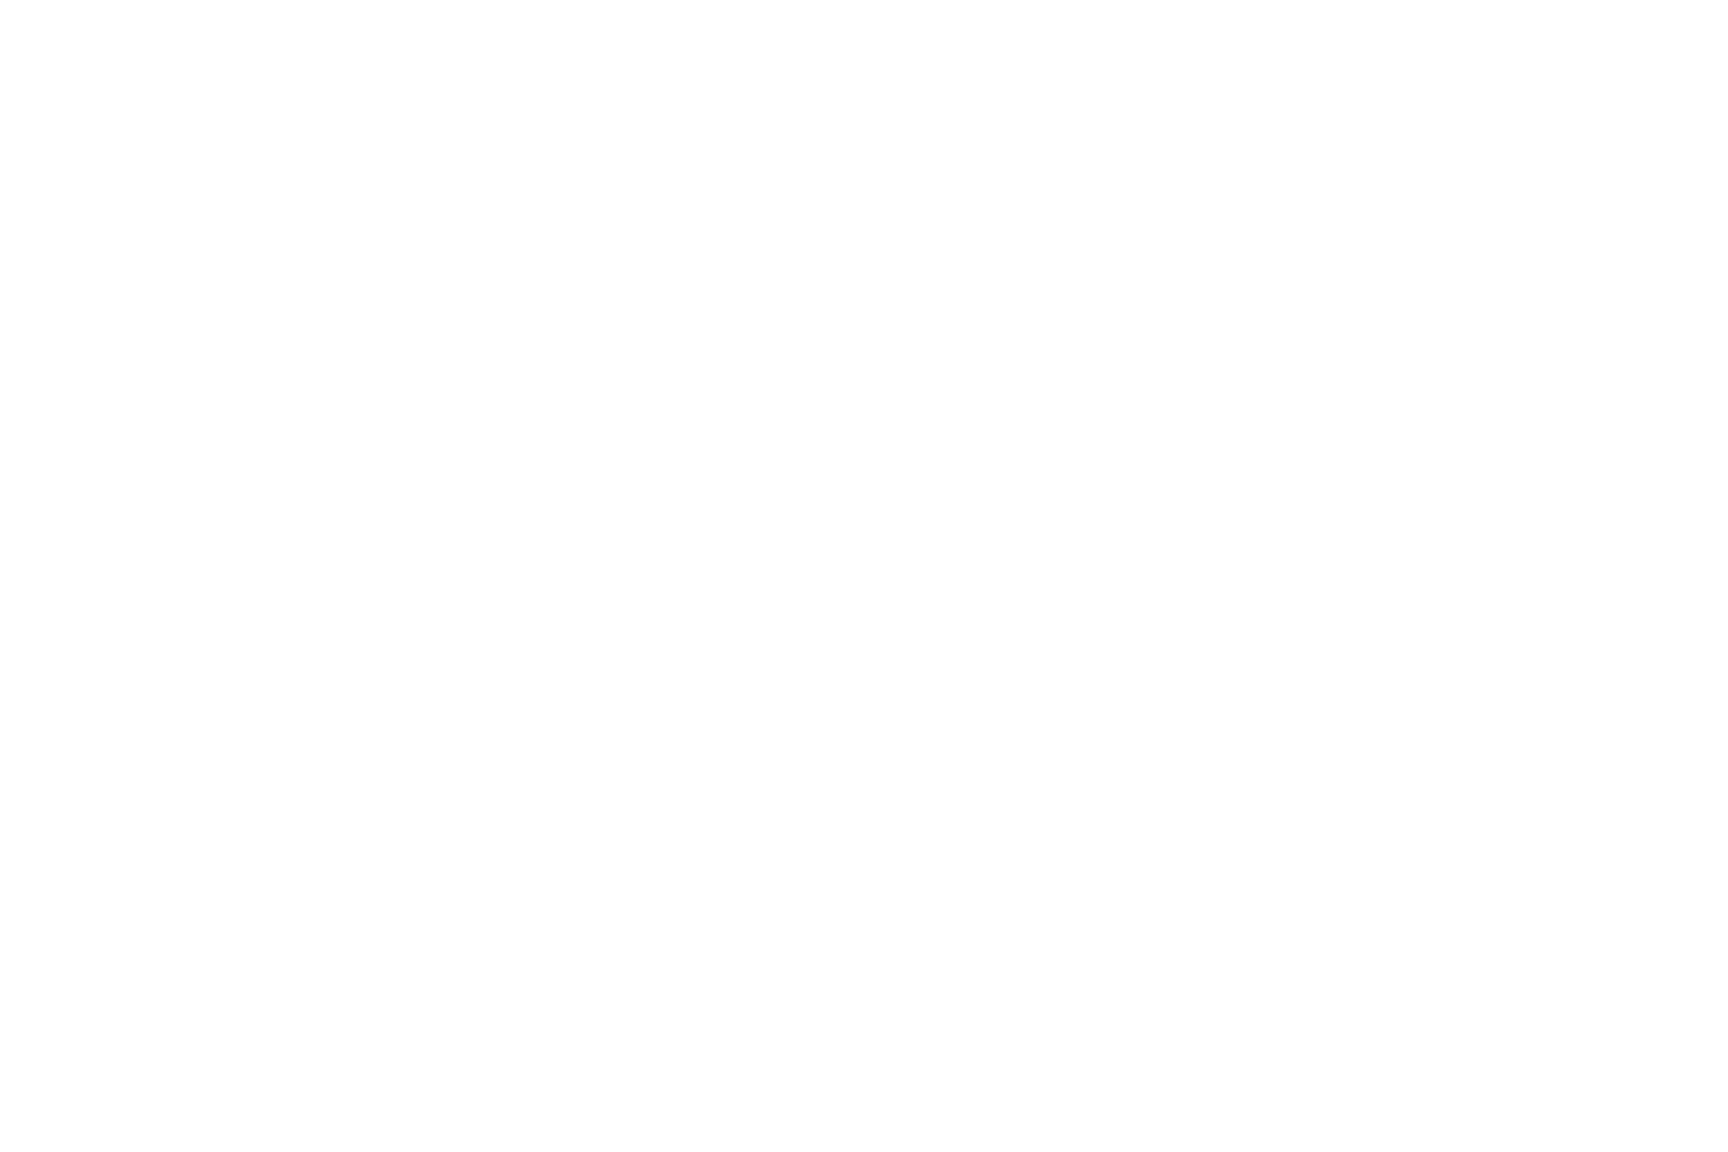

In [62]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


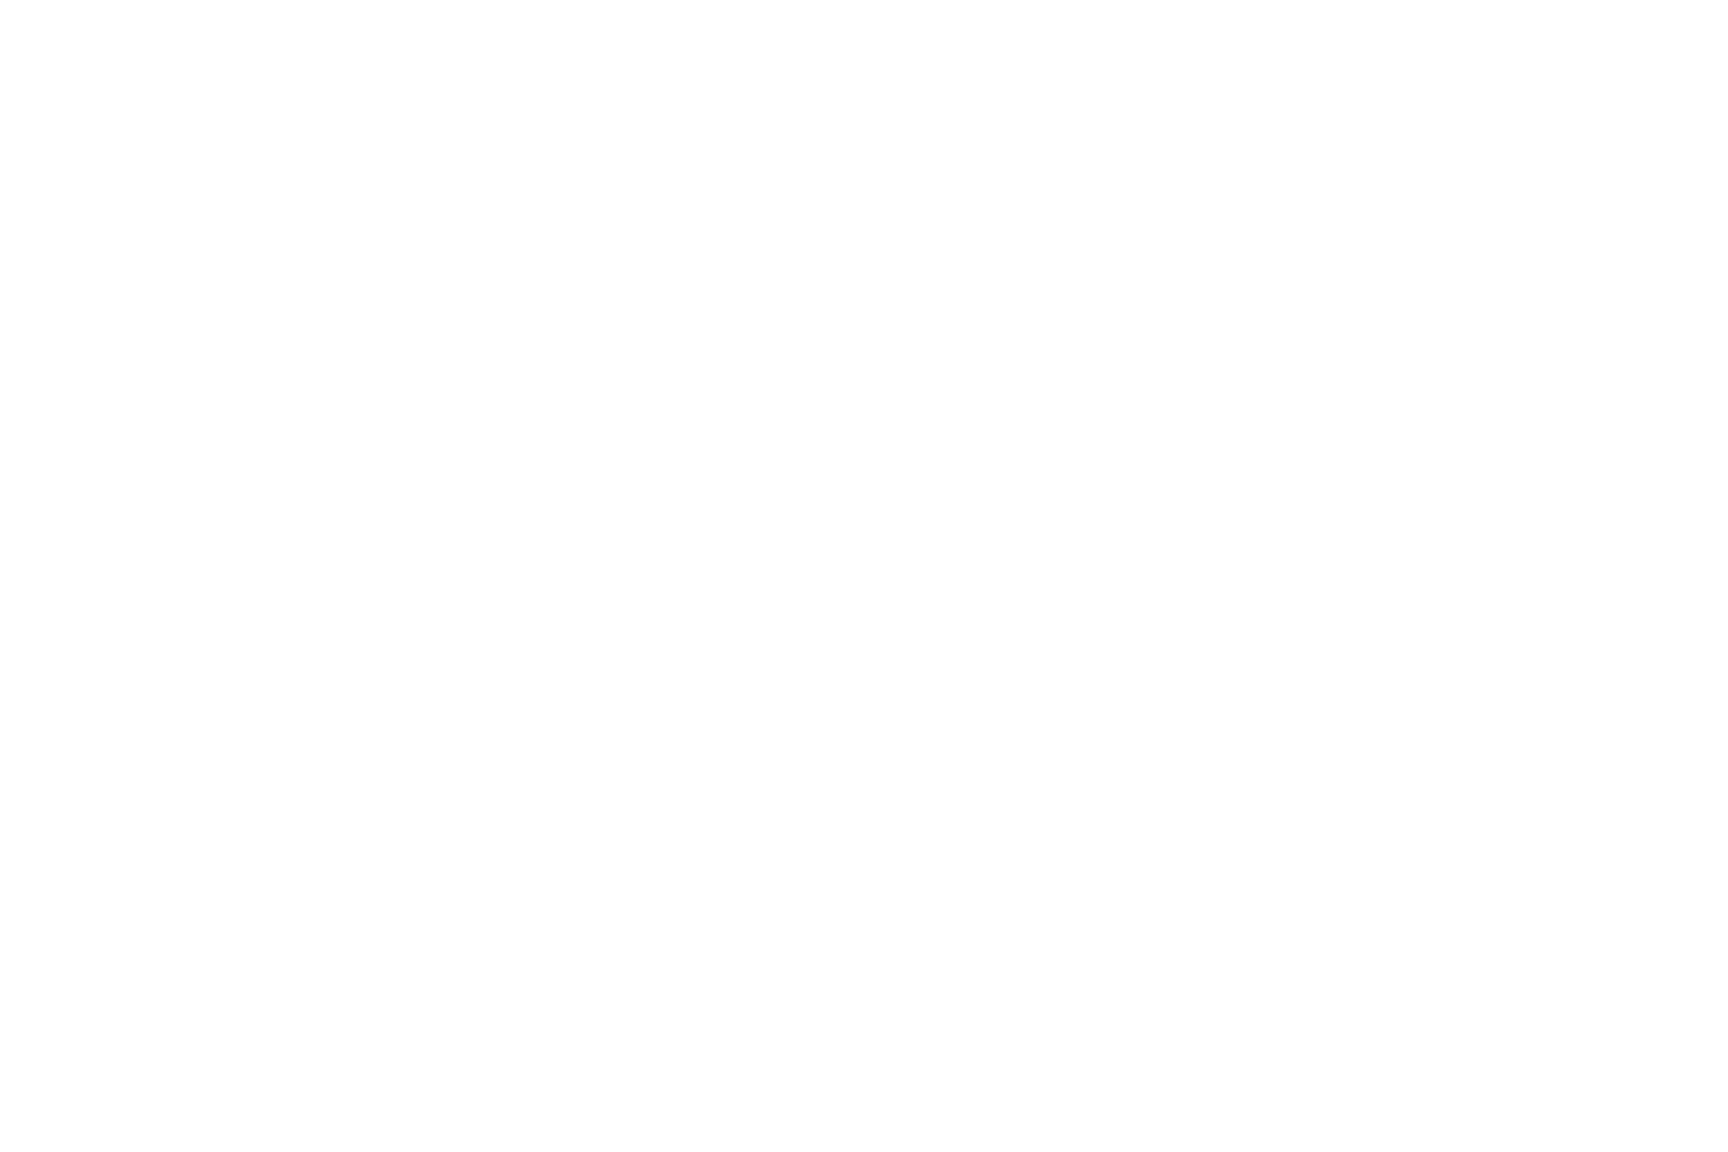

<IPython.core.display.Javascript object>


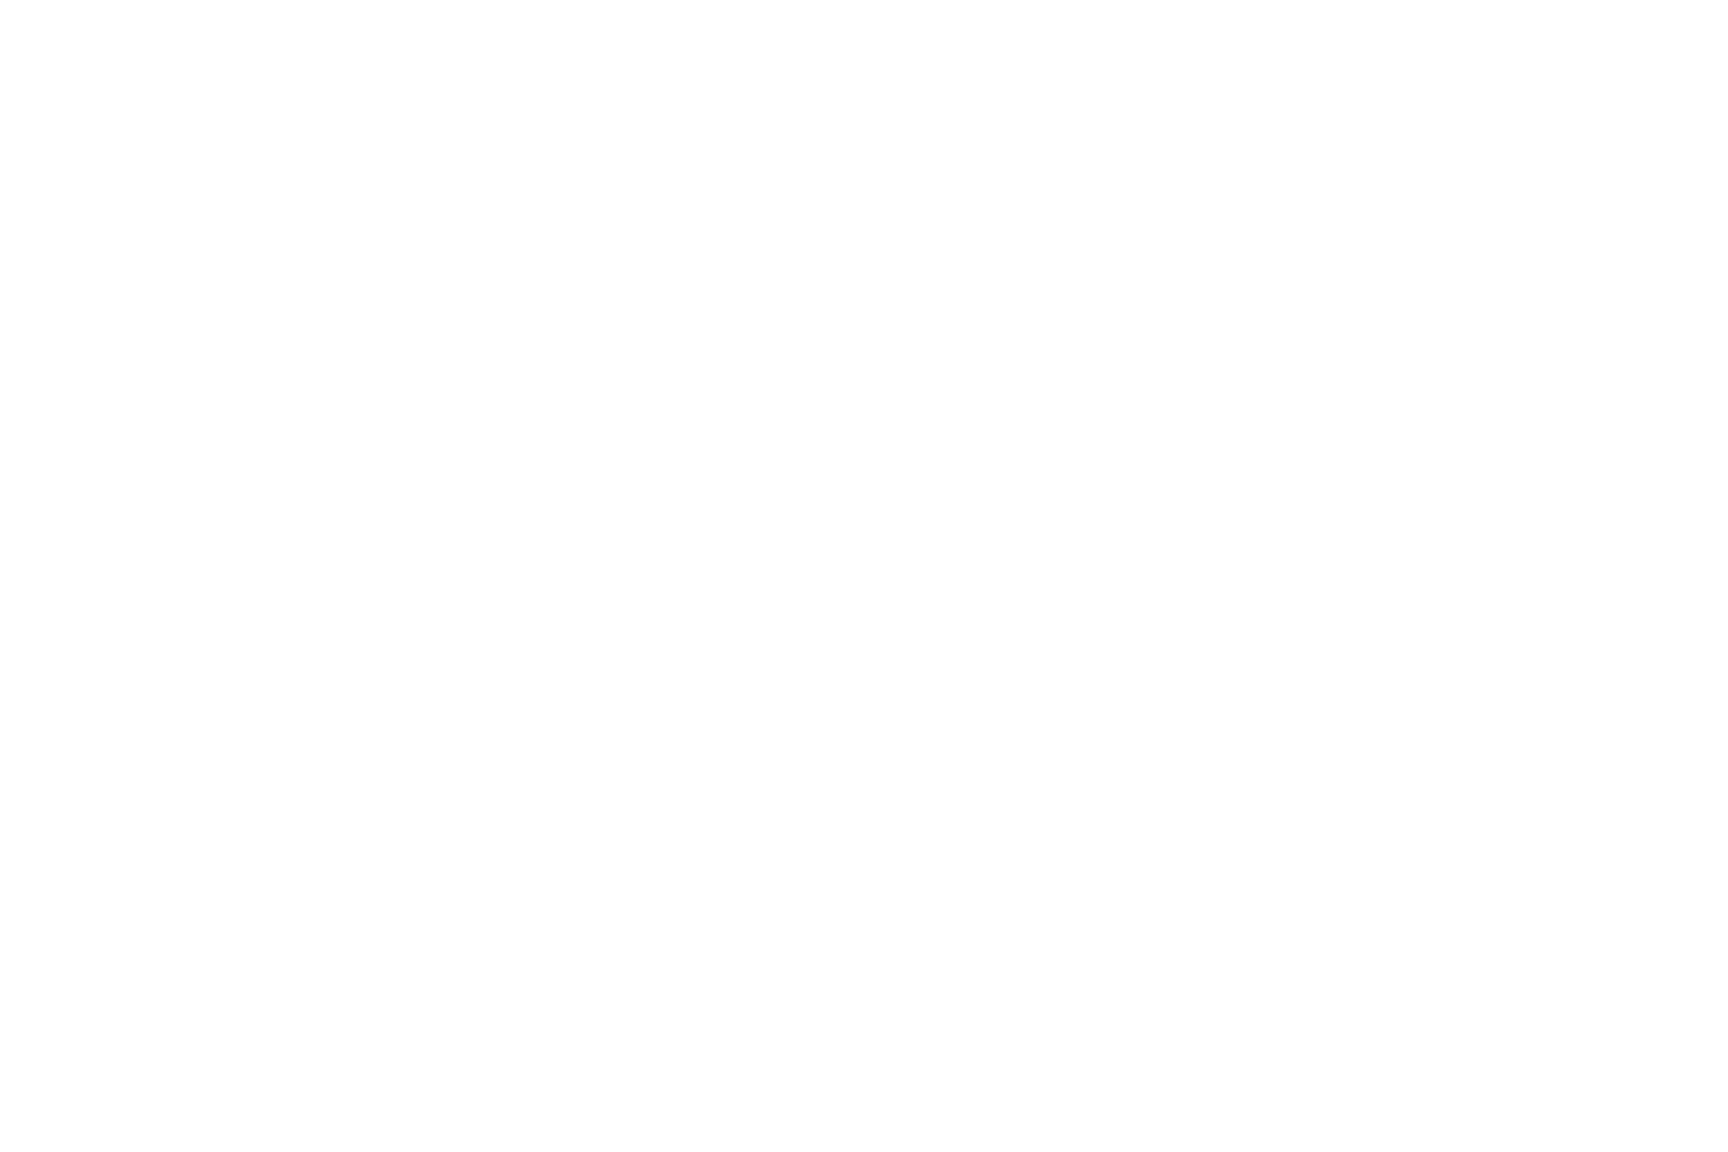

In [63]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


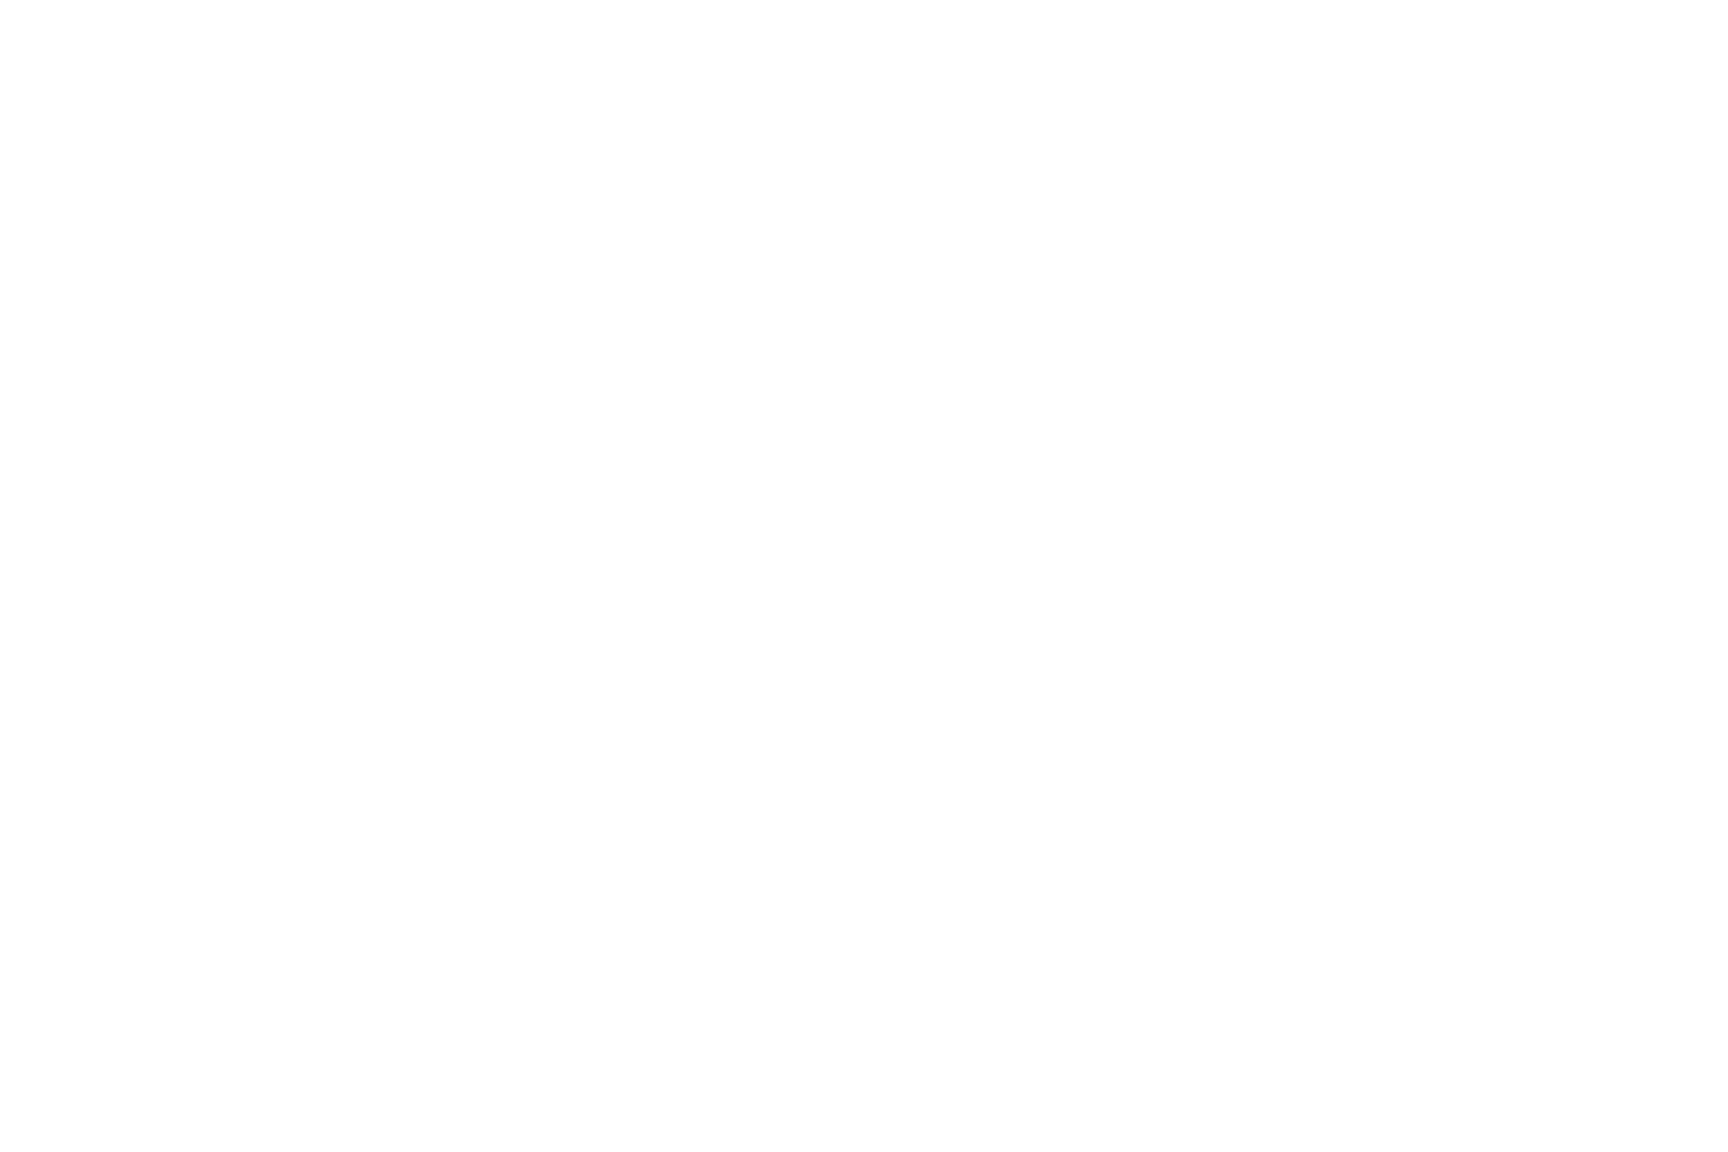

<IPython.core.display.Javascript object>


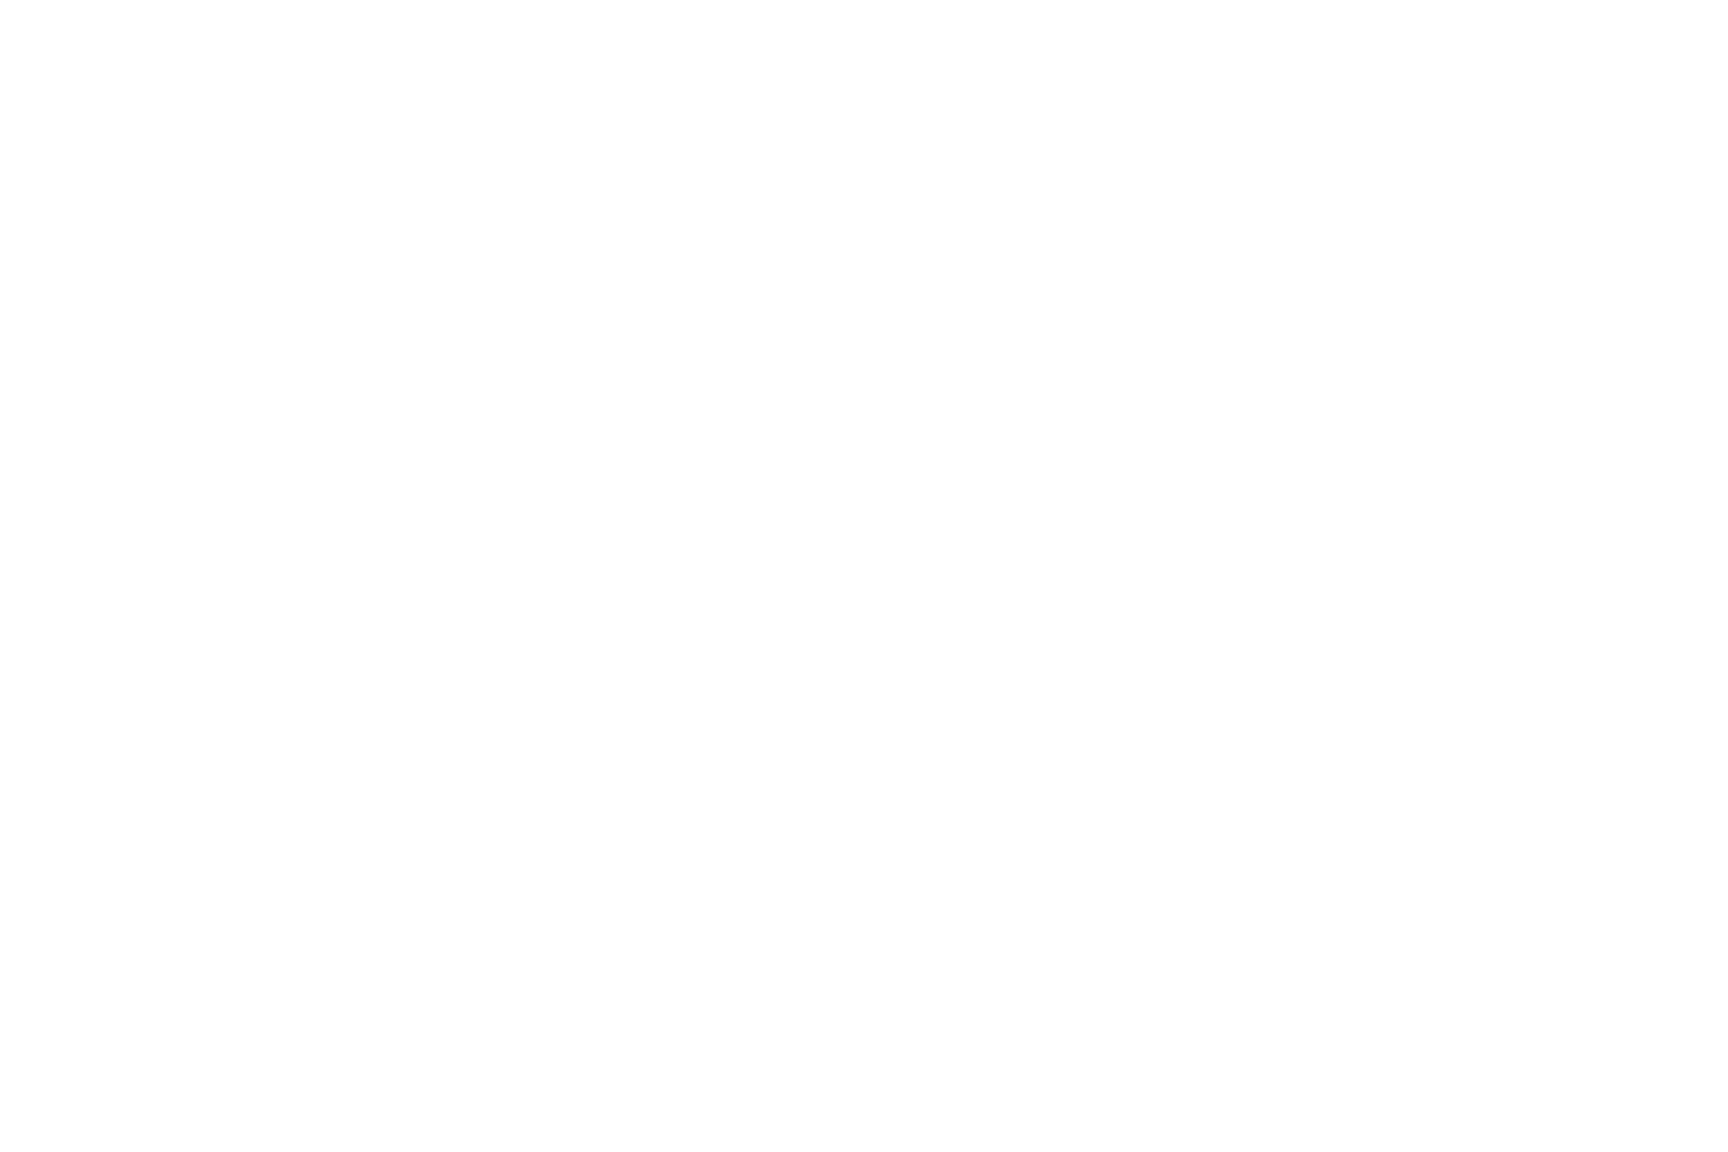

In [64]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


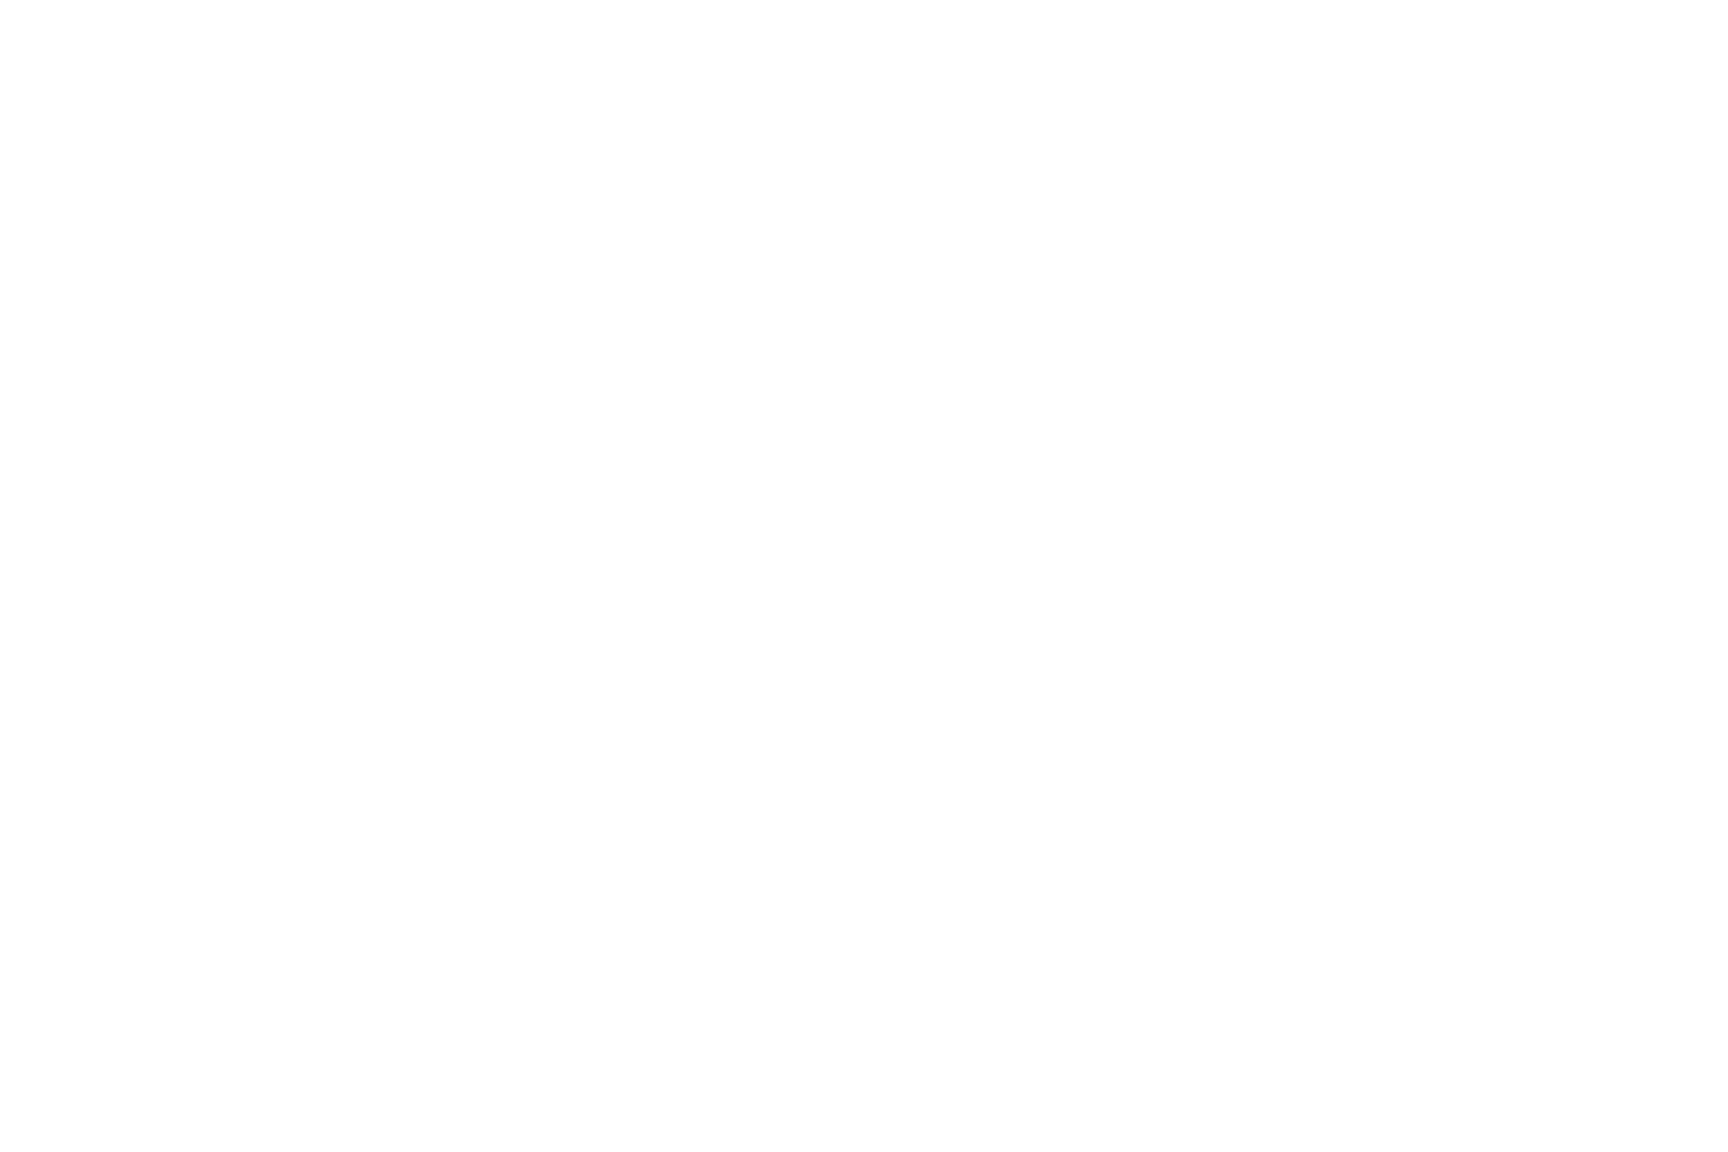

<IPython.core.display.Javascript object>


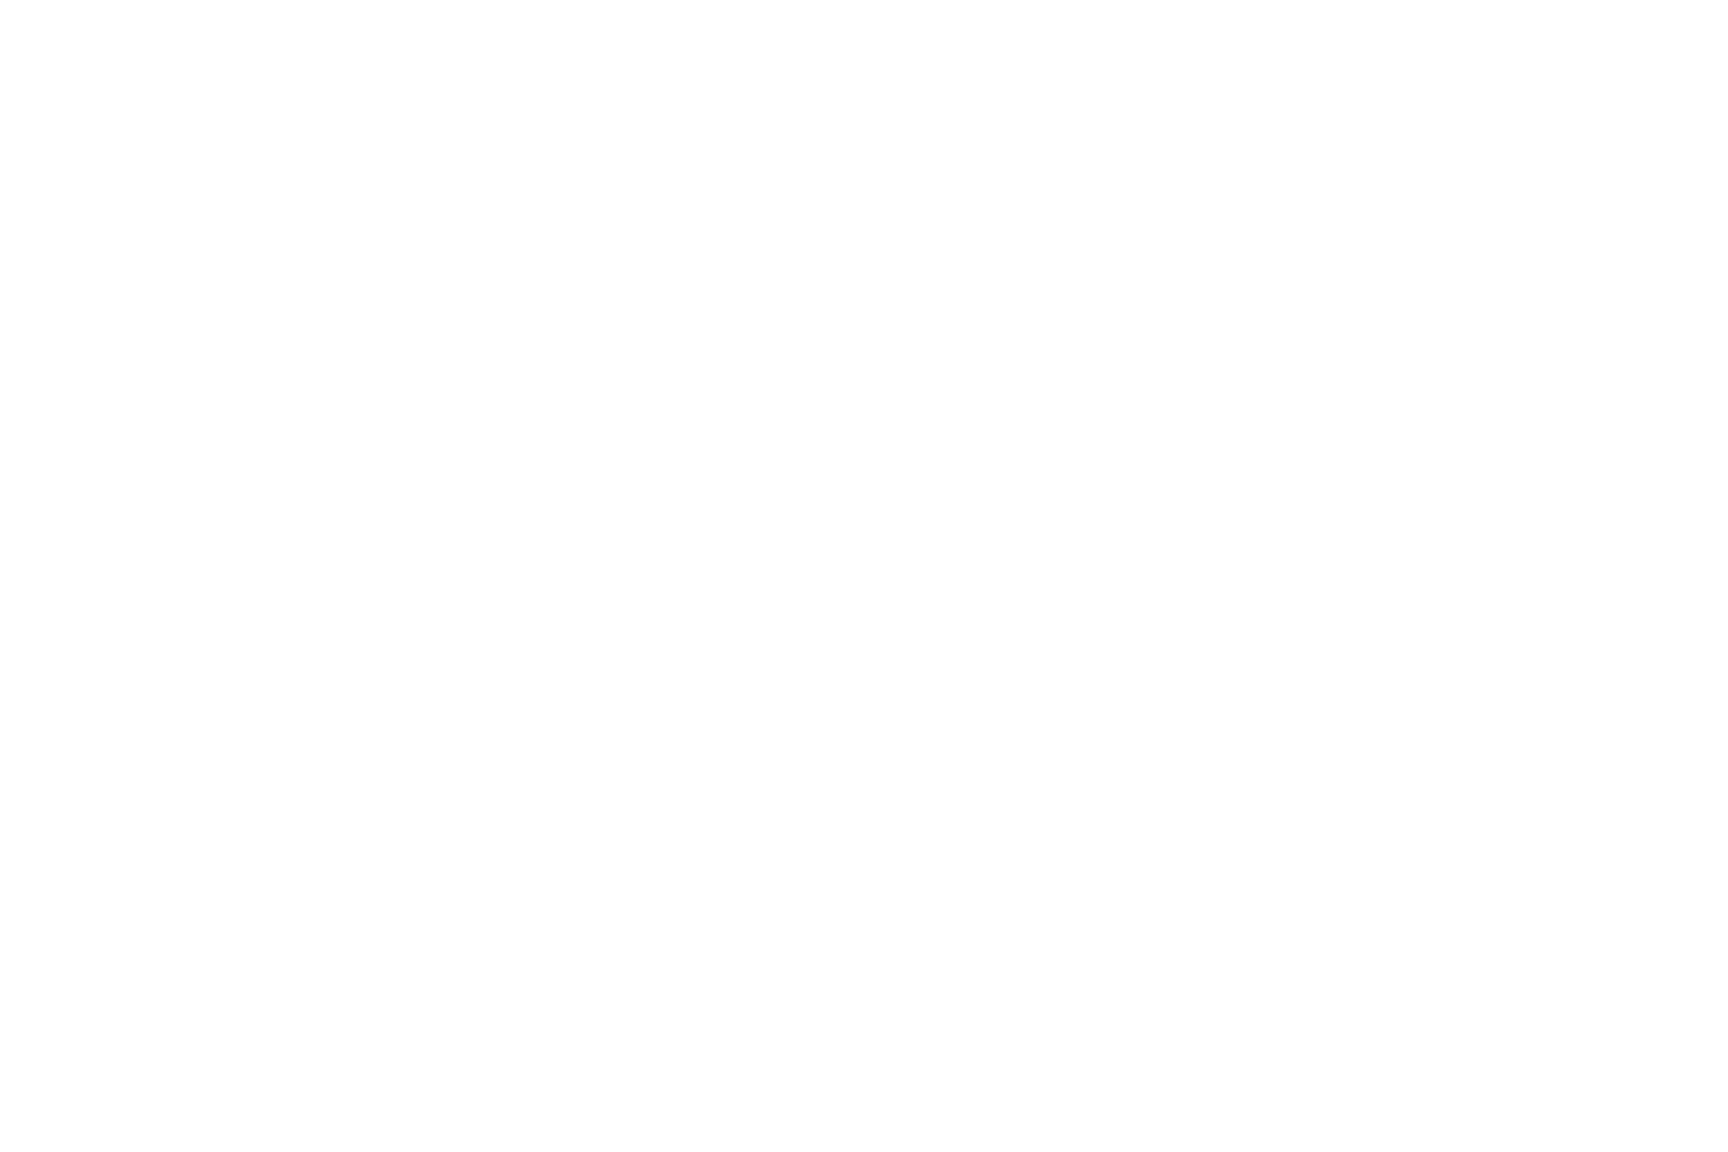

In [65]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


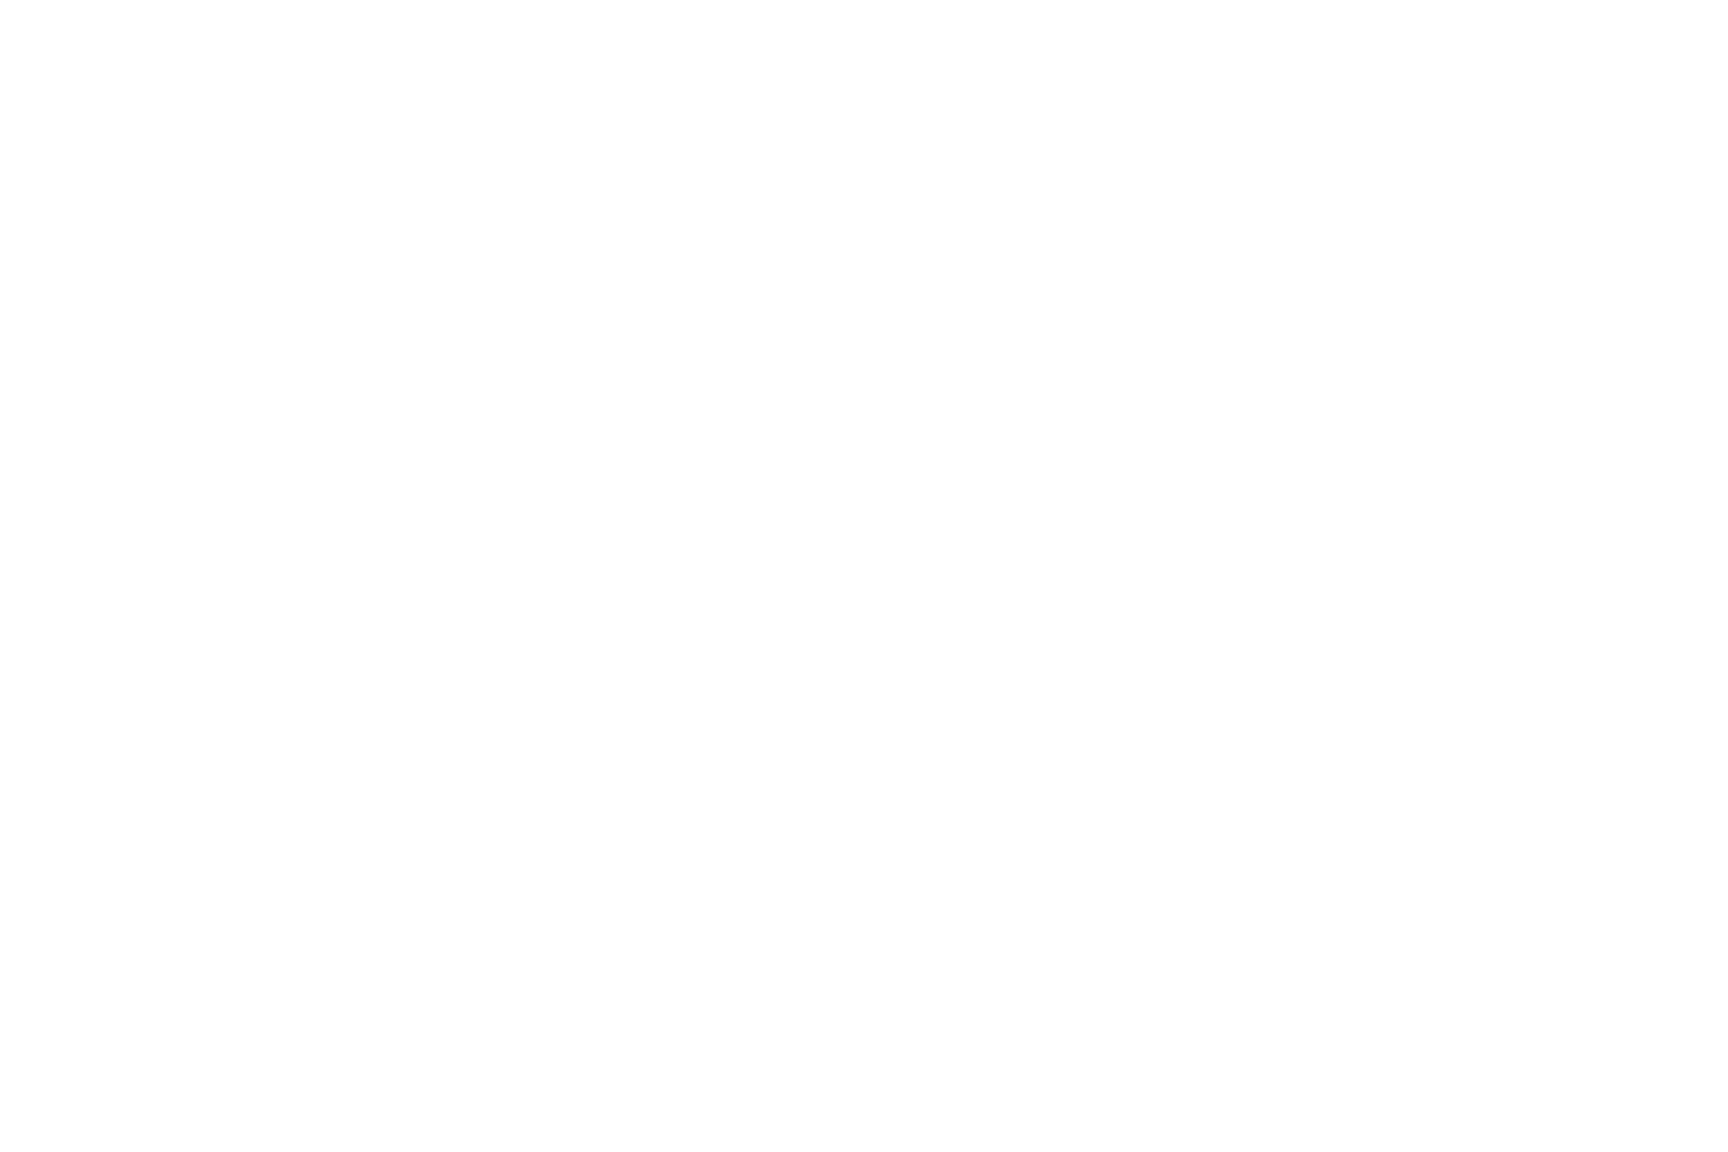

<IPython.core.display.Javascript object>


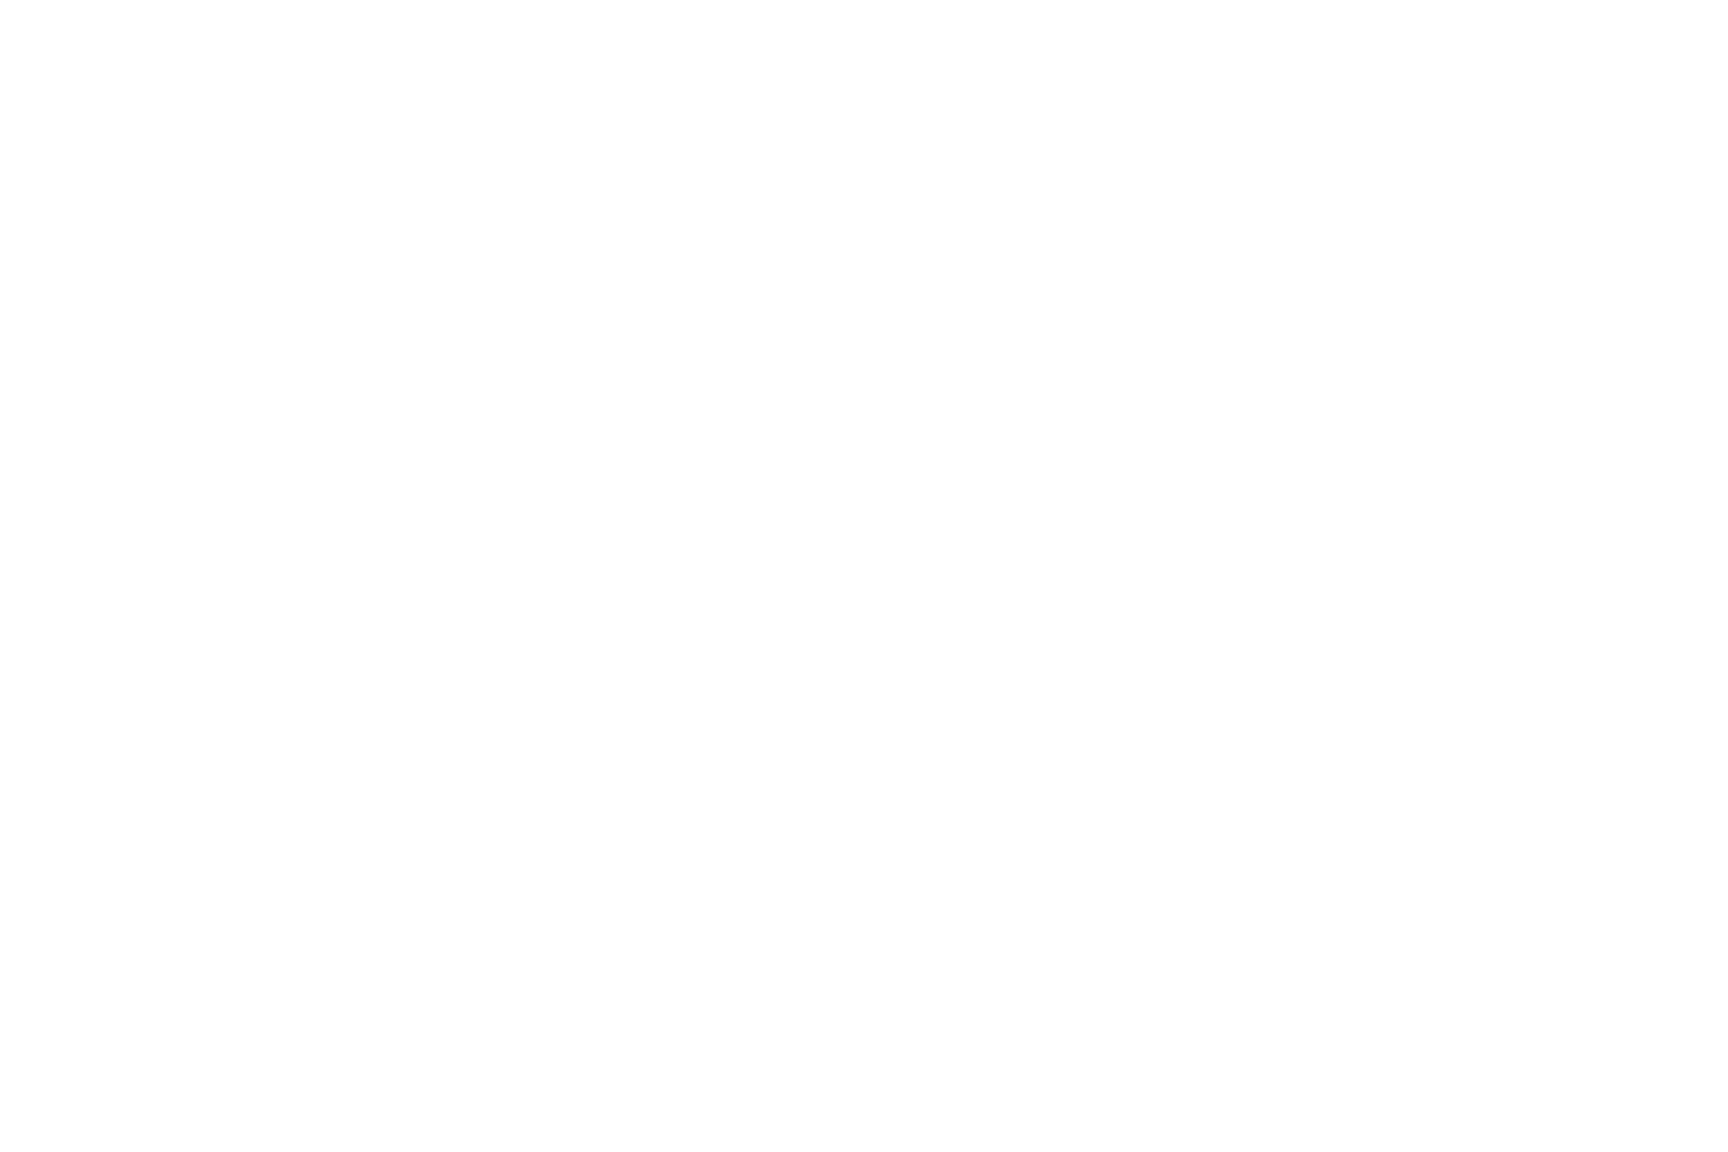

In [66]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


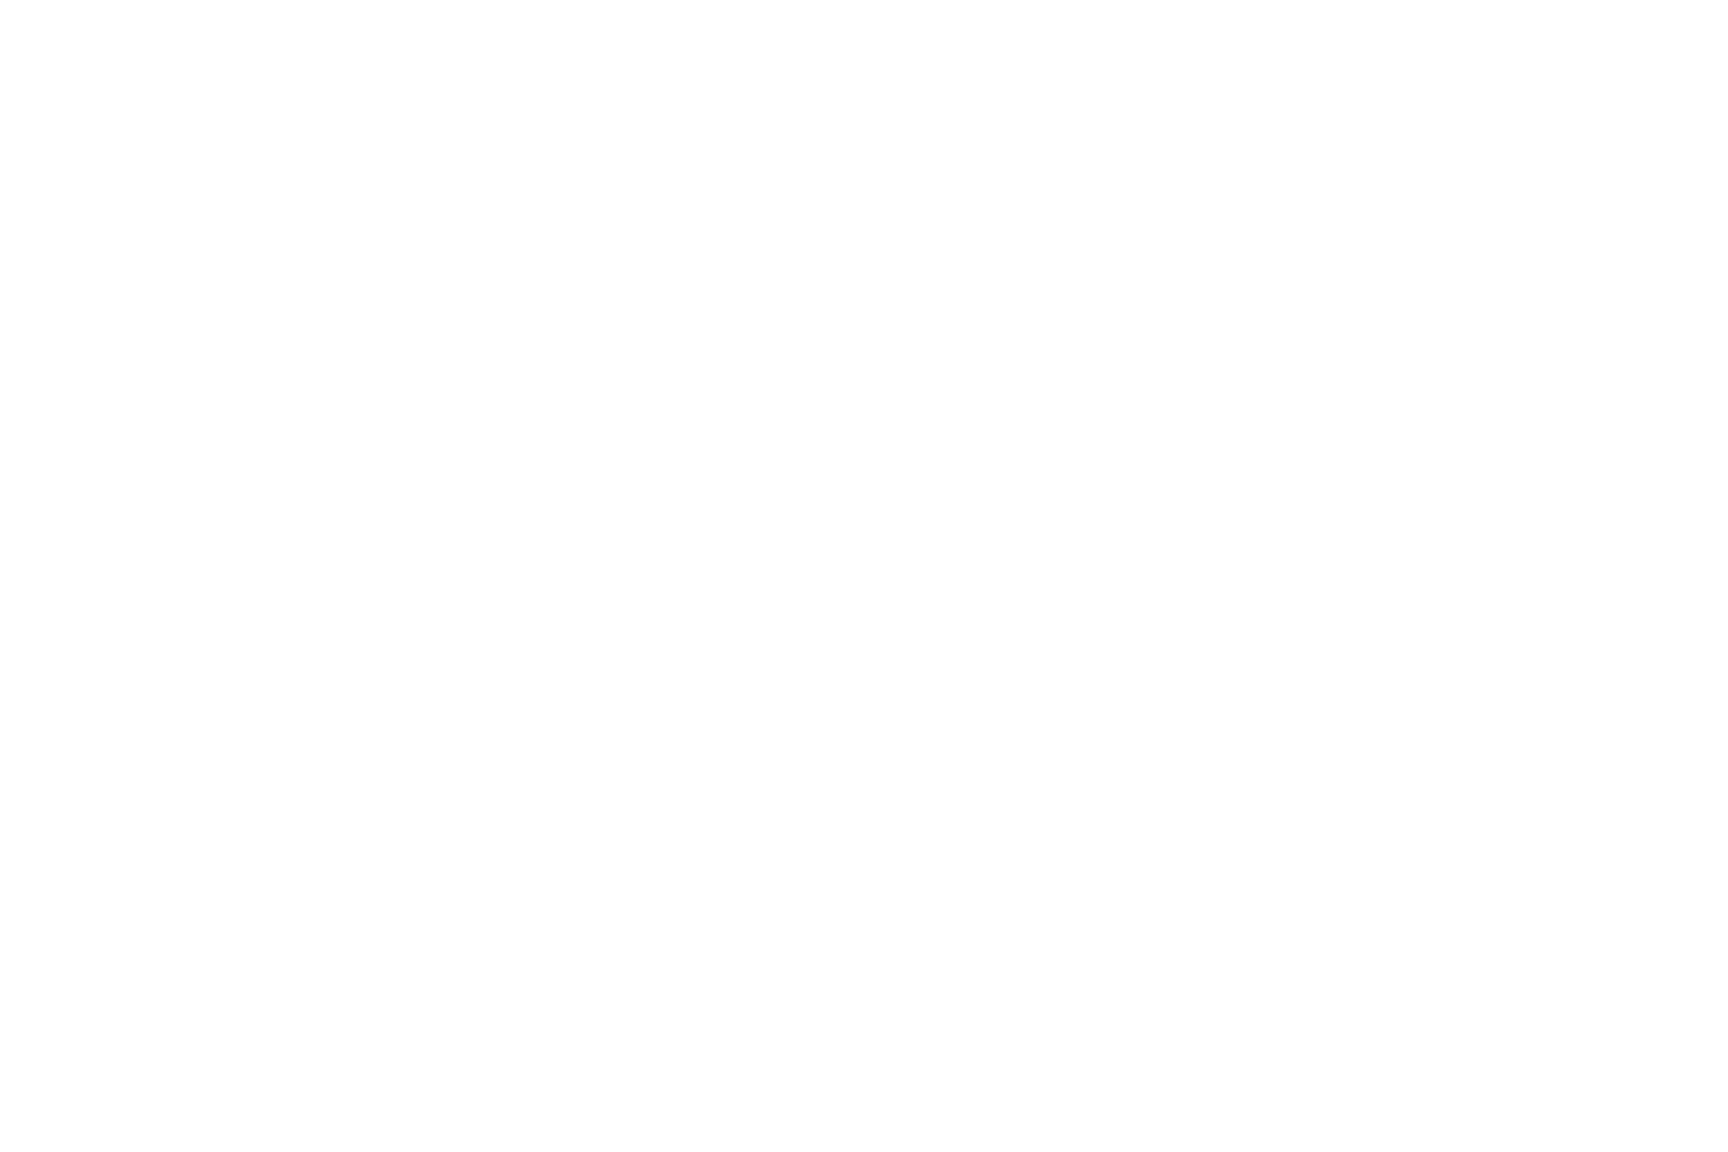

<IPython.core.display.Javascript object>


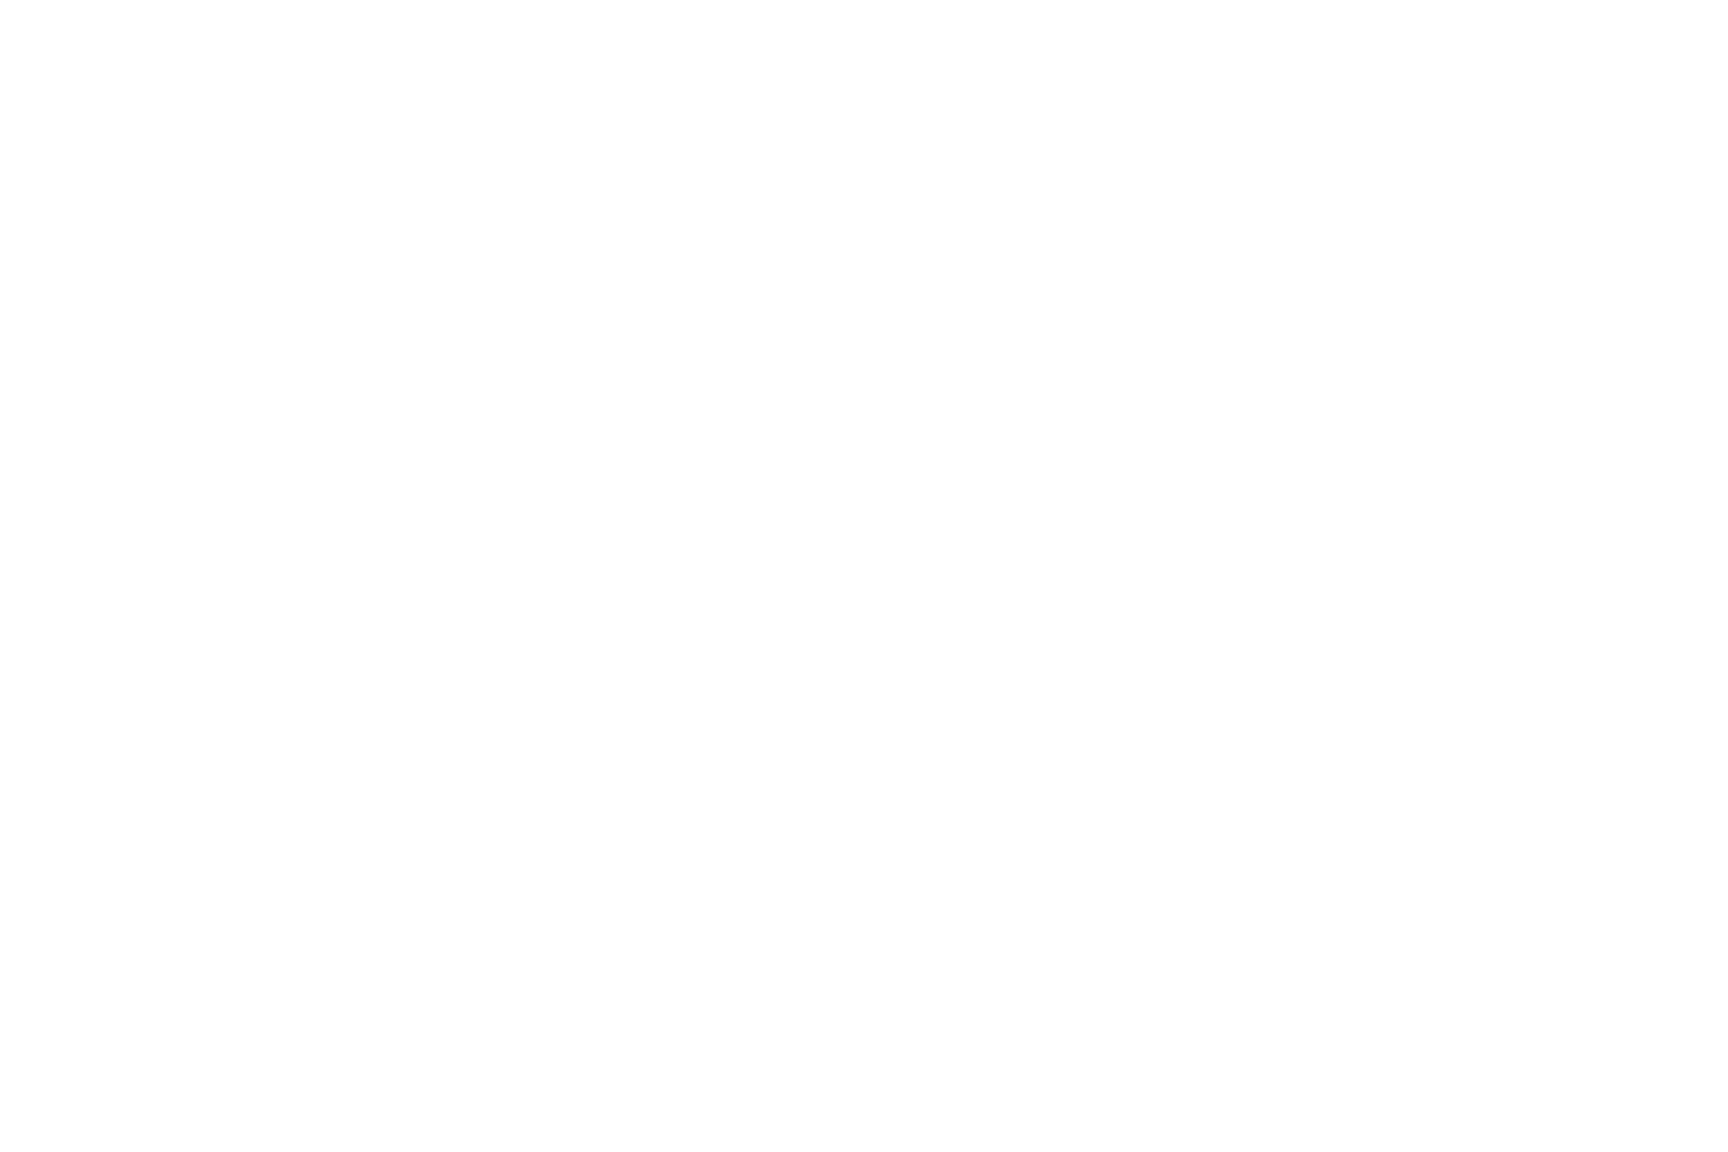

In [67]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [68]:
print("Validation Analysis 1day-Forecast and last 16 weeks evolution plot for: https://FuelBigData.com/blog is done!")

Validation Analysis 1day-Forecast and last 16 weeks evolution plot for: https://FuelBigData.com/blog is done!


In [69]:
exit()